# Important Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno
import sweetviz

# User defined Functions

In [2]:
def fn_kruskal(v):
    from scipy.stats import kruskal

    print("Kruskal Wallis H-test test:")

    H, pval = kruskal(*v)

    print("H-statistic:", H)
    print("P-Value:", pval)

    if pval < 0.05:
        print("Reject NULL hypothesis - Significant differences exist between groups.")
    if pval > 0.05:
        print("Accept NULL hypothesis - No significant difference between groups.")

In [207]:

def fn_ordinal_analysis(df2,feature):
    #frequency table for bathroom

    df_ = pd.DataFrame(
                                    {'Value' :df2[feature].value_counts().index ,
                                     'Count_In_training' : df2[feature].value_counts().values, 
                                     'Count%_In_training' : df2[feature].value_counts(normalize=True).values * 100,}
                                    )

    x = round(df2.groupby(feature)['price'].describe())

    fig = plt.figure(figsize=(16,12))
    gs = fig.add_gridspec(2, 2)

    ax1 = fig.add_subplot(222)
    ax1.pie(df_['Count_In_training'],labels=df_.index)
    ax1.title.set_text('Pie Chart')

    ax2 = fig.add_subplot(221)
    font_size=12
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = df_.values, rowLabels = df_.index, bbox=bbox, colLabels=df_.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    ax2.title.set_text('Frequency Table')

    ax3 = fig.add_subplot(gs[1, :])
    font_size=12
    bbox=[0, 0, 1, 1]
    ax3.axis('off')
    mpl_table = ax3.table(cellText = x.values, rowLabels = x.index, bbox=bbox, colLabels=x.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    ax3.title.set_text('Price Distribution')
    plt.show()

    # bathroom vs price
    sns.catplot(y = "price", x = feature, data = df2.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 2)
    plt.title(str("Price Distribution Vs" + feature))
    plt.show()


# Glimpse of Data

In [4]:
df = pd.read_csv('cleaned.csv')

In [5]:
df.head()

transaction  balcony  bathroom ownership            society      status  \
0  new_property        0       2.0       NaN         GBP_ATHENS  Possession   
1  new_property        0       3.0       NaN         GBP_ATHENS  Possession   
2  new_property        0       3.0       NaN   ANANTA_LIFESTYLE  Possession   
3  new_property        0       3.0  Freehold           THE_LAKE  Possession   
4  new_property        0       3.0       NaN  GATEWAY_OF_DREAMS  Possession   

  facing      furnishing    price  overlooking_garden_park  ...  \
0    NaN  Semi_Furnished  4880000                        0  ...   
1    NaN  Semi_Furnished  9180000                        0  ...   
2    NaN  Semi_Furnished  5500000                        0  ...   
3    NaN     Unfurnished  6400000                        0  ...   
4    NaN     Unfurnished  6290000                        0  ...   

   overlooking_main road  area_type    area  covered_parking  open_parking  \
0                      0          1  1149.0                1             0   
1                      0          1  1938.0                1             0   
2                      0          1  1440.0                1             0   
3                      0          1  1530.0                1             0   
4                      0          1  1705.0                0             0   

   total_parking  parking  floor_number  building_type bhk_count  
0              1        1             5      Apartment       2.0  
1              1        1             5      Apartment       3.0  
2              1        1           NaN  Builder Floor       3.0  
3              1        1             1      Apartment       3.0  
4              0        0           NaN      Apartment       3.0  

[5 rows x 22 columns]

In [6]:
def fn_get_DataType_of_Columns(df):
    d = df.columns.to_series().groupby(df.dtypes).groups
    for x in d:
        print(f"{' ,'.join(d[x])} are of datatype :  '{str(x)} '. ")
        
fn_get_DataType_of_Columns(df)

balcony ,price ,overlooking_garden_park ,overlooking_none ,overlooking_pool ,overlooking_main road ,area_type ,covered_parking ,open_parking ,total_parking ,parking are of datatype :  'int64 '. 
bathroom ,area ,bhk_count are of datatype :  'float64 '. 
transaction ,ownership ,society ,status ,facing ,furnishing ,floor_number ,building_type are of datatype :  'object '. 


In [7]:
def fn_uniqueInEveryColumns(df):
    b = []
    for x in df: 
        if x not in b:
            c = []
            for cols in df.columns.drop(x):
                if(df[x].nunique() == df[cols].nunique()):
                            c.append(cols)
                            b.append(cols)
            if len(c) != 0: 
                print("'"," ', ' ".join(c),"'", 'and',"'",x,"'", 'has same number of unique values =',df[x].nunique()) 
            else: 
                print("'",x,"'",'feature has distinct values =',df[x].nunique())  

fn_uniqueInEveryColumns(df)

' status ', ' overlooking_garden_park ', ' overlooking_none ', ' overlooking_pool ', ' overlooking_main road ', ' area_type ', ' parking ' and ' transaction ' has same number of unique values = 2
' facing ' and ' balcony ' has same number of unique values = 8
' total_parking ' and ' bathroom ' has same number of unique values = 10
' ownership ' feature has distinct values = 4
' society ' feature has distinct values = 98
' furnishing ' feature has distinct values = 3
' price ' feature has distinct values = 529
' area ' feature has distinct values = 518
' covered_parking ' feature has distinct values = 7
' building_type ' and ' open_parking ' has same number of unique values = 6
' floor_number ' feature has distinct values = 24
' bhk_count ' feature has distinct values = 11


In [8]:
## From the obove we can notice onw thing that most of the data is ordinal in nature

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 22 columns):
transaction                2509 non-null object
balcony                    2509 non-null int64
bathroom                   2509 non-null float64
ownership                  1952 non-null object
society                    2509 non-null object
status                     2455 non-null object
facing                     1874 non-null object
furnishing                 2509 non-null object
price                      2509 non-null int64
overlooking_garden_park    2509 non-null int64
overlooking_none           2509 non-null int64
overlooking_pool           2509 non-null int64
overlooking_main road      2509 non-null int64
area_type                  2509 non-null int64
area                       2509 non-null float64
covered_parking            2509 non-null int64
open_parking               2509 non-null int64
total_parking              2509 non-null int64
parking                    2509 non-n

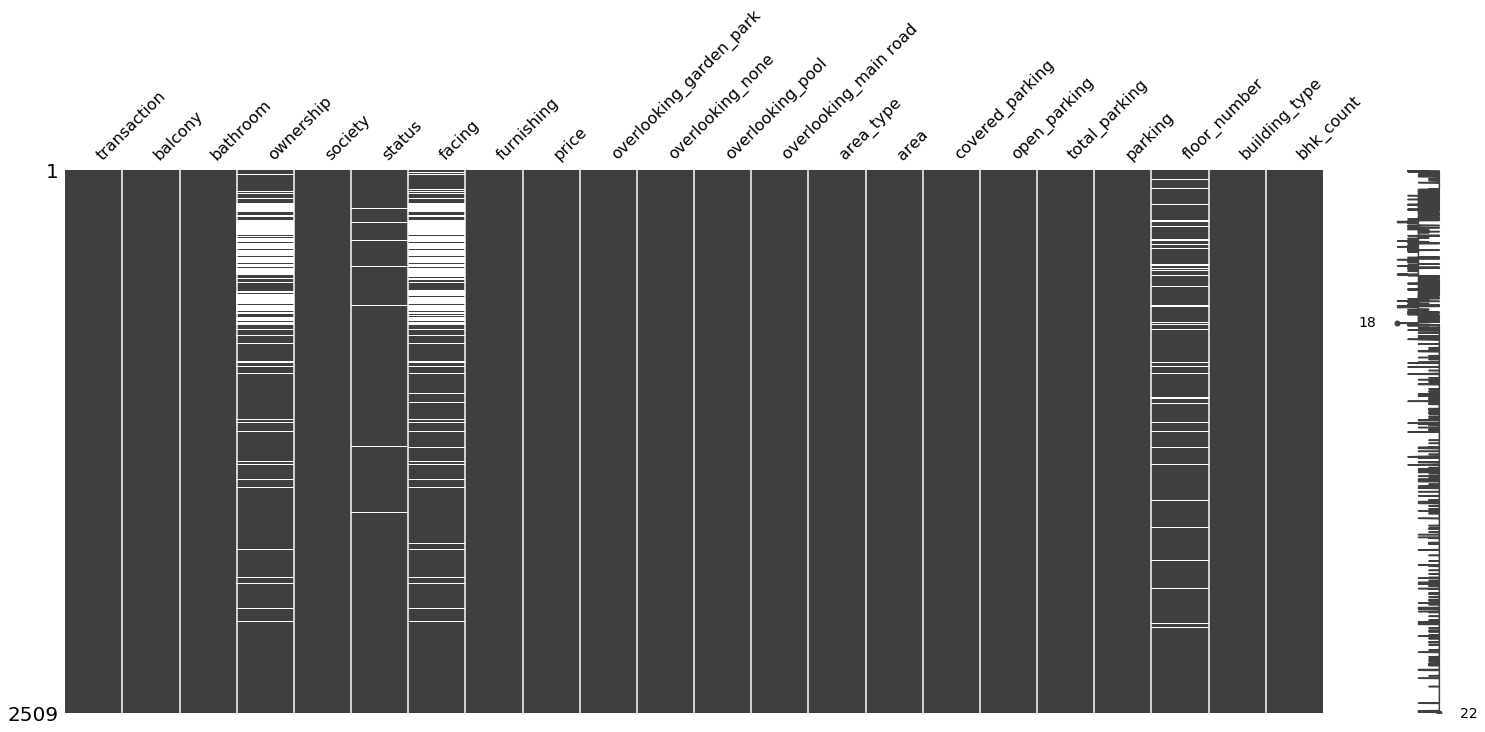

In [10]:
msno.matrix(df);

In [11]:
tgt = df.price
price = df.price

In [12]:
df = df[df.building_type == 'Apartment']

## Statistical Analysis

In [13]:
df.describe(include='all').T

count unique             top  freq         mean  \
transaction              1544      2    new_property   954          NaN   
balcony                  1544    NaN             NaN   NaN      2.44041   
bathroom                 1544    NaN             NaN   NaN      2.70466   
ownership                1263      4        Freehold  1242          NaN   
society                  1544     79              NG   340          NaN   
status                   1518      2   Ready_to_Move   870          NaN   
facing                   1228      8            East   591          NaN   
furnishing               1544      3  Semi_Furnished  1248          NaN   
price                    1544    NaN             NaN   NaN  5.83951e+06   
overlooking_garden_park  1544    NaN             NaN   NaN     0.630181   
overlooking_none         1544    NaN             NaN   NaN     0.237694   
overlooking_pool         1544    NaN             NaN   NaN     0.239637   
overlooking_main road    1544    NaN             NaN   NaN     0.501295   
area_type                1544    NaN             NaN   NaN     0.378886   
area                     1544    NaN             NaN   NaN      3188.06   
covered_parking          1544    NaN             NaN   NaN     0.634067   
open_parking             1544    NaN             NaN   NaN     0.289508   
total_parking            1544    NaN             NaN   NaN     0.923575   
parking                  1544    NaN             NaN   NaN      0.66386   
floor_number             1530     23               5   318          NaN   
building_type            1544      1       Apartment  1544          NaN   
bhk_count                1544    NaN             NaN   NaN      2.81671   

                                 std  min      25%       50%       75%  \
transaction                      NaN  NaN      NaN       NaN       NaN   
balcony                      1.24782    0        2         3         3   
bathroom                     0.74366    1        2         3         3   
ownership                        NaN  NaN      NaN       NaN       NaN   
society                          NaN  NaN      NaN       NaN       NaN   
status                           NaN  NaN      NaN       NaN       NaN   
facing                           NaN  NaN      NaN       NaN       NaN   
furnishing                       NaN  NaN      NaN       NaN       NaN   
price                    2.83616e+06    0  4.3e+06  5.59e+06  6.68e+06   
overlooking_garden_park     0.482912    0        0         1         1   
overlooking_none            0.425809    0        0         0         0   
overlooking_pool               0.427    0        0         0         0   
overlooking_main road        0.50016    0        0         1         1   
area_type                   0.485267    0        0         0         1   
area                         69030.1    0     1050    1302.5      1650   
covered_parking             0.594993    0        0         1         1   
open_parking                0.518979    0        0         0         1   
total_parking               0.850825    0        0         1         1   
parking                      0.47254    0        0         1         1   
floor_number                     NaN  NaN      NaN       NaN       NaN   
building_type                    NaN  NaN      NaN       NaN       NaN   
bhk_count                   0.638538    1        3         3         3   

                               max  
transaction                    NaN  
balcony                          6  
bathroom                         6  
ownership                      NaN  
society                        NaN  
status                         NaN  
facing                         NaN  
furnishing                     NaN  
price                      4.5e+07  
overlooking_garden_park          1  
overlooking_none                 1  
overlooking_pool                 1  
overlooking_main road            1  
area_type                        1  
area                     2.712e+06  
cov

# Analysis of Area

I want to focus on the Area since it is the only continuous variable present in independent variables. Let's create a histogram to see if the area is Normally distributed. If we want to create any linear model, it is essential that the features are normally distributed. This is one of the assumptions of multiple linear regression.

## Normality check using Plots

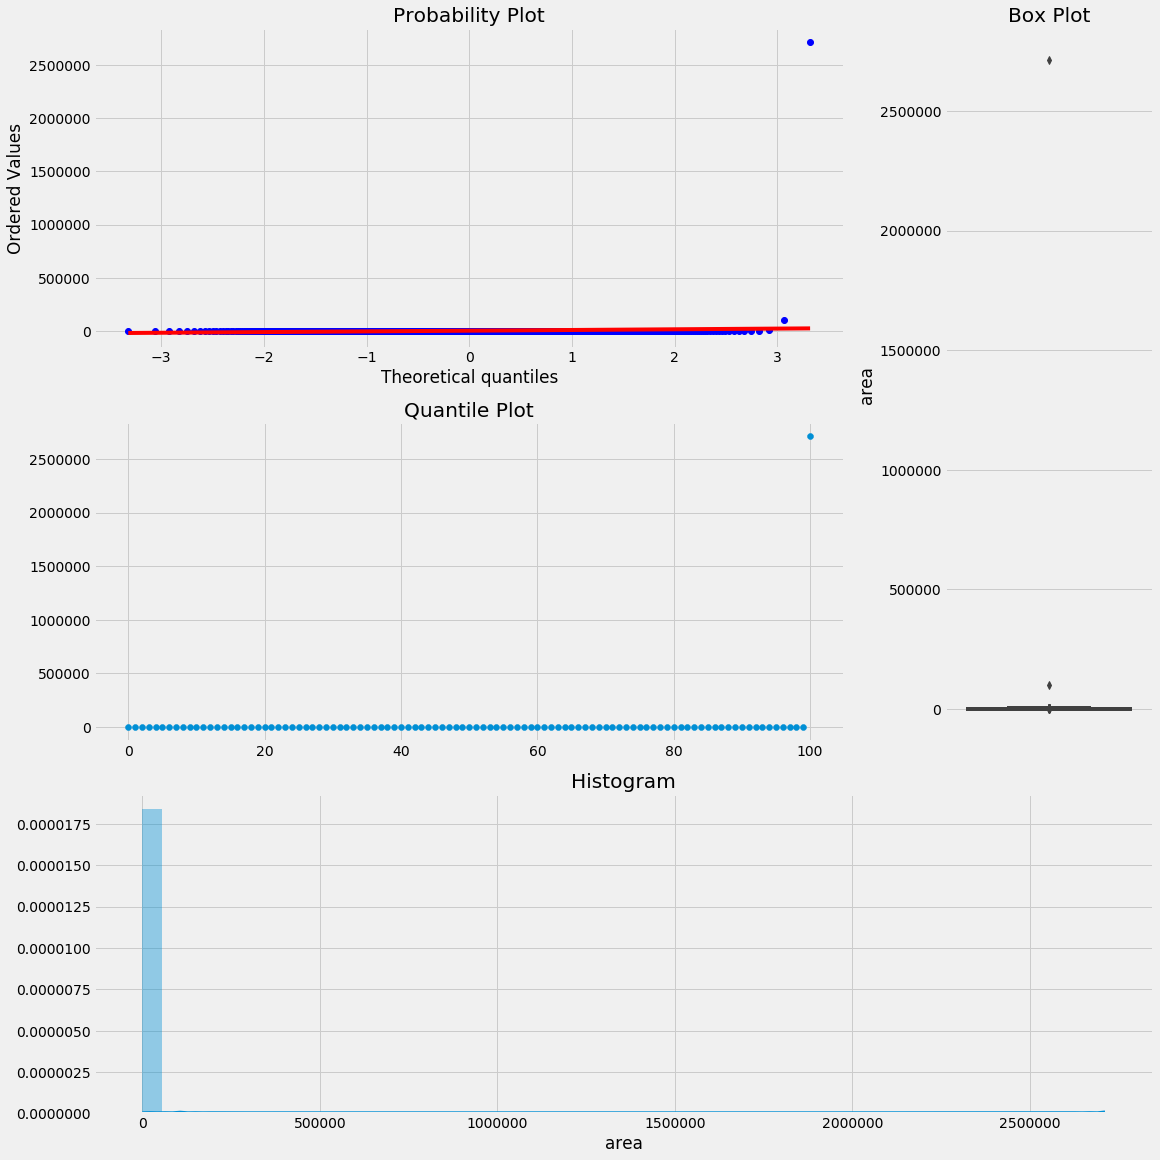

In [14]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(16,16))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[2, :3])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:2, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
    ax4 = fig.add_subplot(grid[1, 0:2])
    ## Set title. 
    ax4.set_title('Quantile Plot')
    ## Plotting the box plot. 
    plt.scatter(x = range(0,101),y=[df.loc[:,feature].quantile(i/100) for i in range(0,101)])
    
    
   
plotting_3_chart(df, 'area')

<div class="alert alert-block alert-info">

These <b>three</b> charts above can tell us a lot about our Area.

* Area is not normally distributed.
* Extreme Outlier must be removed.
* We can observe value at zero Area which is not possible so we will remove all the values whose area is 0.
</div>

In [15]:
#Removing Zeros

df = df[df.area!=0]
print('Dropped all the record where area is 0.')

Dropped all the record where area is 0.


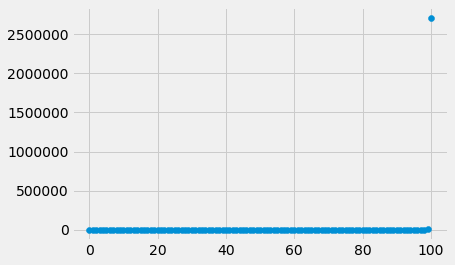

In [16]:
#checking for outlier at the 5th quartile
plt.scatter(x = range(0,101),y=[df.loc[:,'area'].quantile(i/100) for i in range(0,101)])

<div class="alert alert-block alert-danger">
Outlier can be seen at the 100th quantile that means there are some extreme values at the max side so lets check for the top 5 maximum values.
</div>

In [17]:
print("The 5 maximum areas are", sorted(df.area,reverse=True)[0:5])

The 5 maximum areas are [2712000.0, 100800.0, 6000.0, 4500.0, 3361.0]


In [18]:
df[[i in sorted(df.area,reverse=True)[0:5] for i in df.area]]

transaction  balcony  bathroom ownership              society  \
16         resale        1       2.0  Freehold     SBP_HOUSING_PARK   
25         resale        0       2.0       NaN                   NG   
160        resale        0       5.0       NaN  GREEN_LOTUS_SAKSHAM   
471        resale        0       5.0       NaN                   NG   
510  new_property        4       3.0  Freehold                   NG   
690        resale        0       2.0       NaN                   NG   

            status facing      furnishing     price  overlooking_garden_park  \
16   Ready_to_Move    NaN     Unfurnished   3100000                        0   
25   Ready_to_Move    NaN  Semi_Furnished  12000000                        0   
160            NaN    NaN  Semi_Furnished  12500000                        0   
471  Ready_to_Move    NaN  Semi_Furnished  12500000                        0   
510     Possession   East     Unfurnished   6200000                        1   
690  Ready_to_Move    NaN       Furnished         0                        0   

     ...  overlooking_main road  area_type       area  covered_parking  \
16   ...                      0          1  2712000.0                0   
25   ...                      0          1     6000.0                0   
160  ...                      0          1     3361.0                0   
471  ...                      0          1     3361.0                0   
510  ...                      1          0   100800.0                0   
690  ...                      0          1     4500.0                0   

     open_parking  total_parking  parking  floor_number  building_type  \
16              0              0        0             2      Apartment   
25              0              0        0             1      Apartment   
160             0              0        0             2      Apartment   
471             0              0        0             4      Apartment   
510             0              0        0             4      Apartment   
690             0              0        0             7      Apartment   

    bhk_count  
16        2.0  
25        3.0  
160       5.0  
471       5.0  
510       3.0  
690       3.0  

[6 rows x 22 columns]

<div class="alert alert-block alert-info">

Above we can see that there are two houses which have huge areas in comparision with other houses in chandigarh. And after looking for information for houses with these areas no justification is found and it seems like there was some mistake during data scrapping. These are Outliers and will effect out geometrical models while training so we will remove them.
</div>

In [19]:
df = df[[i not in sorted(df.area,reverse=True)[0:2] for i in df.area]]

In [20]:
sorted(df.area,reverse=True)[0:2]

[6000.0, 4500.0]

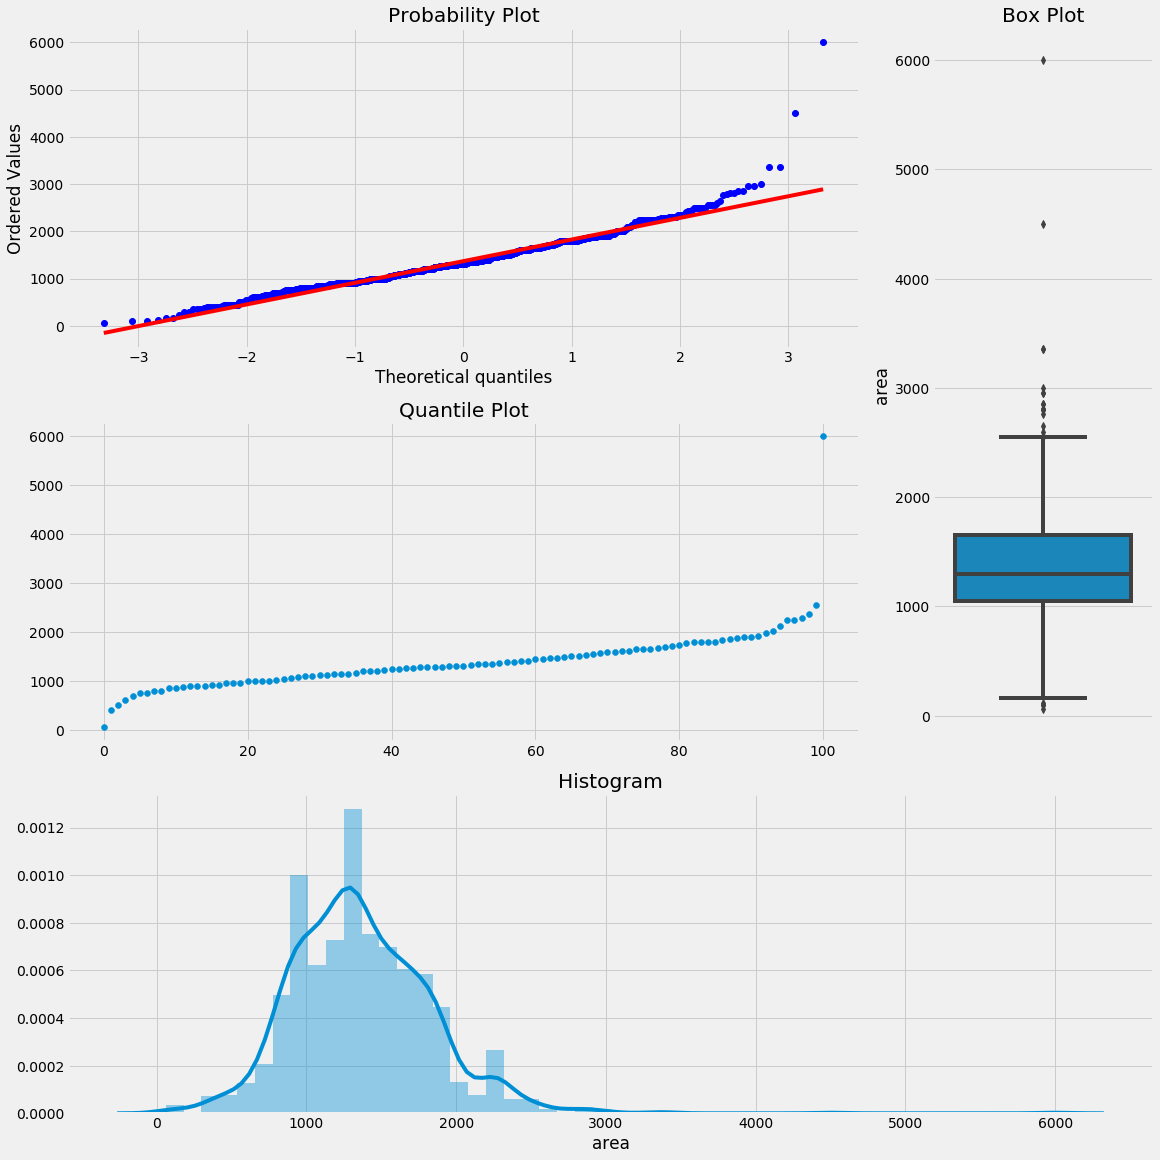

In [21]:
plotting_3_chart(df,'area')

In [22]:
df[[i > 3000 for i in df.area]]

transaction  balcony  bathroom ownership              society  \
25       resale        0       2.0       NaN                   NG   
160      resale        0       5.0       NaN  GREEN_LOTUS_SAKSHAM   
471      resale        0       5.0       NaN                   NG   
690      resale        0       2.0       NaN                   NG   

            status facing      furnishing     price  overlooking_garden_park  \
25   Ready_to_Move    NaN  Semi_Furnished  12000000                        0   
160            NaN    NaN  Semi_Furnished  12500000                        0   
471  Ready_to_Move    NaN  Semi_Furnished  12500000                        0   
690  Ready_to_Move    NaN       Furnished         0                        0   

     ...  overlooking_main road  area_type    area  covered_parking  \
25   ...                      0          1  6000.0                0   
160  ...                      0          1  3361.0                0   
471  ...                      0          1  3361.0                0   
690  ...                      0          1  4500.0                0   

     open_parking  total_parking  parking  floor_number  building_type  \
25              0              0        0             1      Apartment   
160             0              0        0             2      Apartment   
471             0              0        0             4      Apartment   
690             0              0        0             7      Apartment   

    bhk_count  
25        3.0  
160       5.0  
471       5.0  
690       3.0  

[4 rows x 22 columns]

In [23]:
df[[i > 3000 for i in df.area]]

transaction  balcony  bathroom ownership              society  \
25       resale        0       2.0       NaN                   NG   
160      resale        0       5.0       NaN  GREEN_LOTUS_SAKSHAM   
471      resale        0       5.0       NaN                   NG   
690      resale        0       2.0       NaN                   NG   

            status facing      furnishing     price  overlooking_garden_park  \
25   Ready_to_Move    NaN  Semi_Furnished  12000000                        0   
160            NaN    NaN  Semi_Furnished  12500000                        0   
471  Ready_to_Move    NaN  Semi_Furnished  12500000                        0   
690  Ready_to_Move    NaN       Furnished         0                        0   

     ...  overlooking_main road  area_type    area  covered_parking  \
25   ...                      0          1  6000.0                0   
160  ...                      0          1  3361.0                0   
471  ...                      0          1  3361.0                0   
690  ...                      0          1  4500.0                0   

     open_parking  total_parking  parking  floor_number  building_type  \
25              0              0        0             1      Apartment   
160             0              0        0             2      Apartment   
471             0              0        0             4      Apartment   
690             0              0        0             7      Apartment   

    bhk_count  
25        3.0  
160       5.0  
471       5.0  
690       3.0  

[4 rows x 22 columns]

In [24]:
#Removing all the areas greater than 3000
df1 = df[[i < 3000 for i in df.area]]

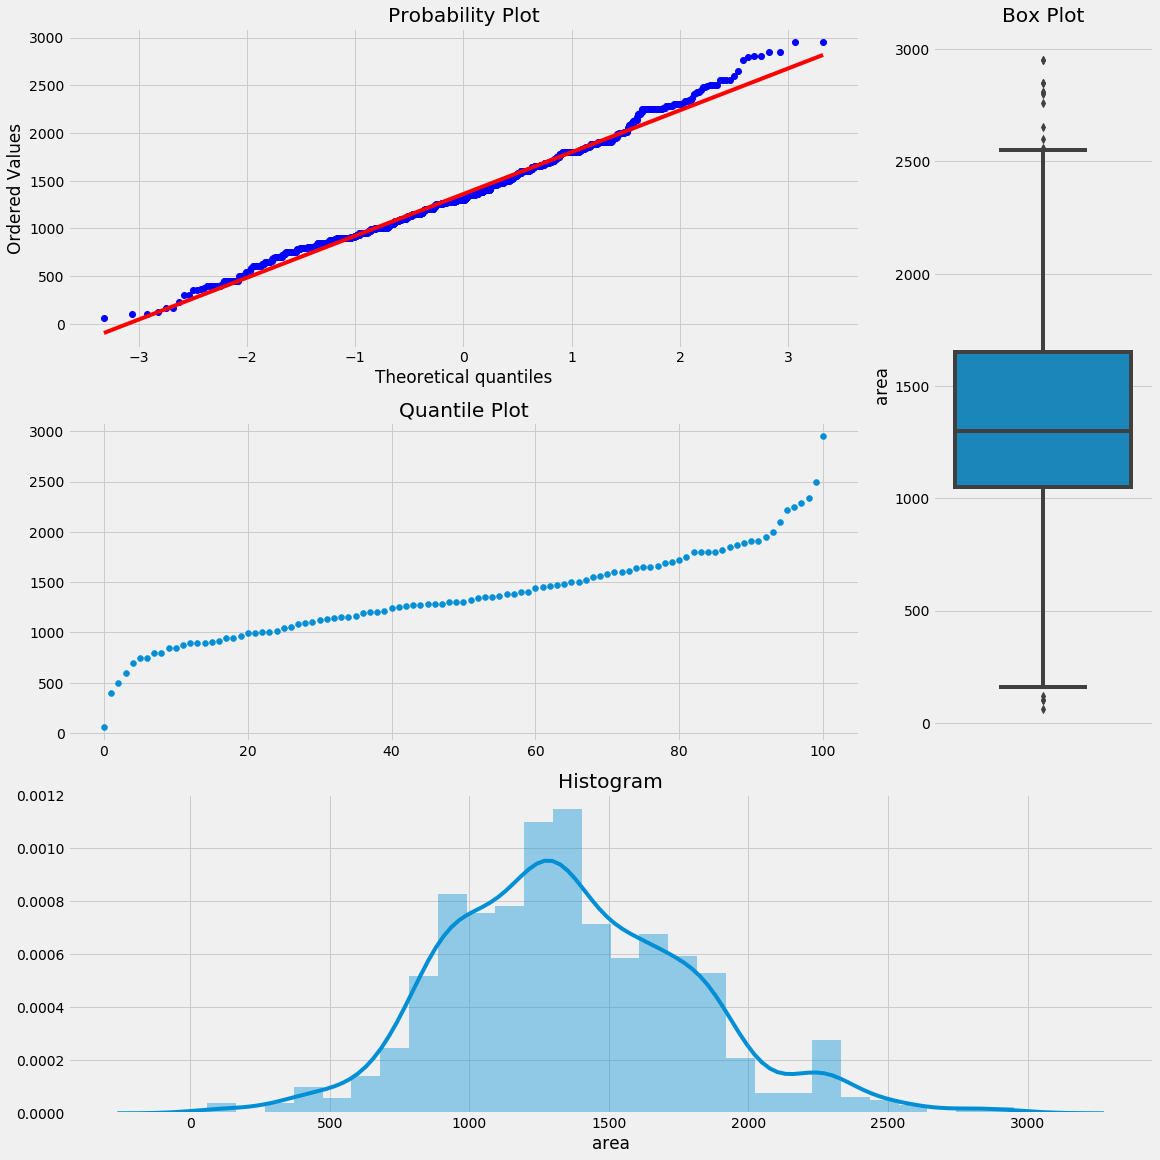

In [25]:
plotting_3_chart(df1,'area')

# Analysis of Price


I want to focus on the target variable which is Price. Let's create a histogram to see if the target variable is Normally distributed. If we want to create any linear model, it is essential that the features are normally distributed. This is one of the assumptions of multiple linear regression.

## Normality check using Plots

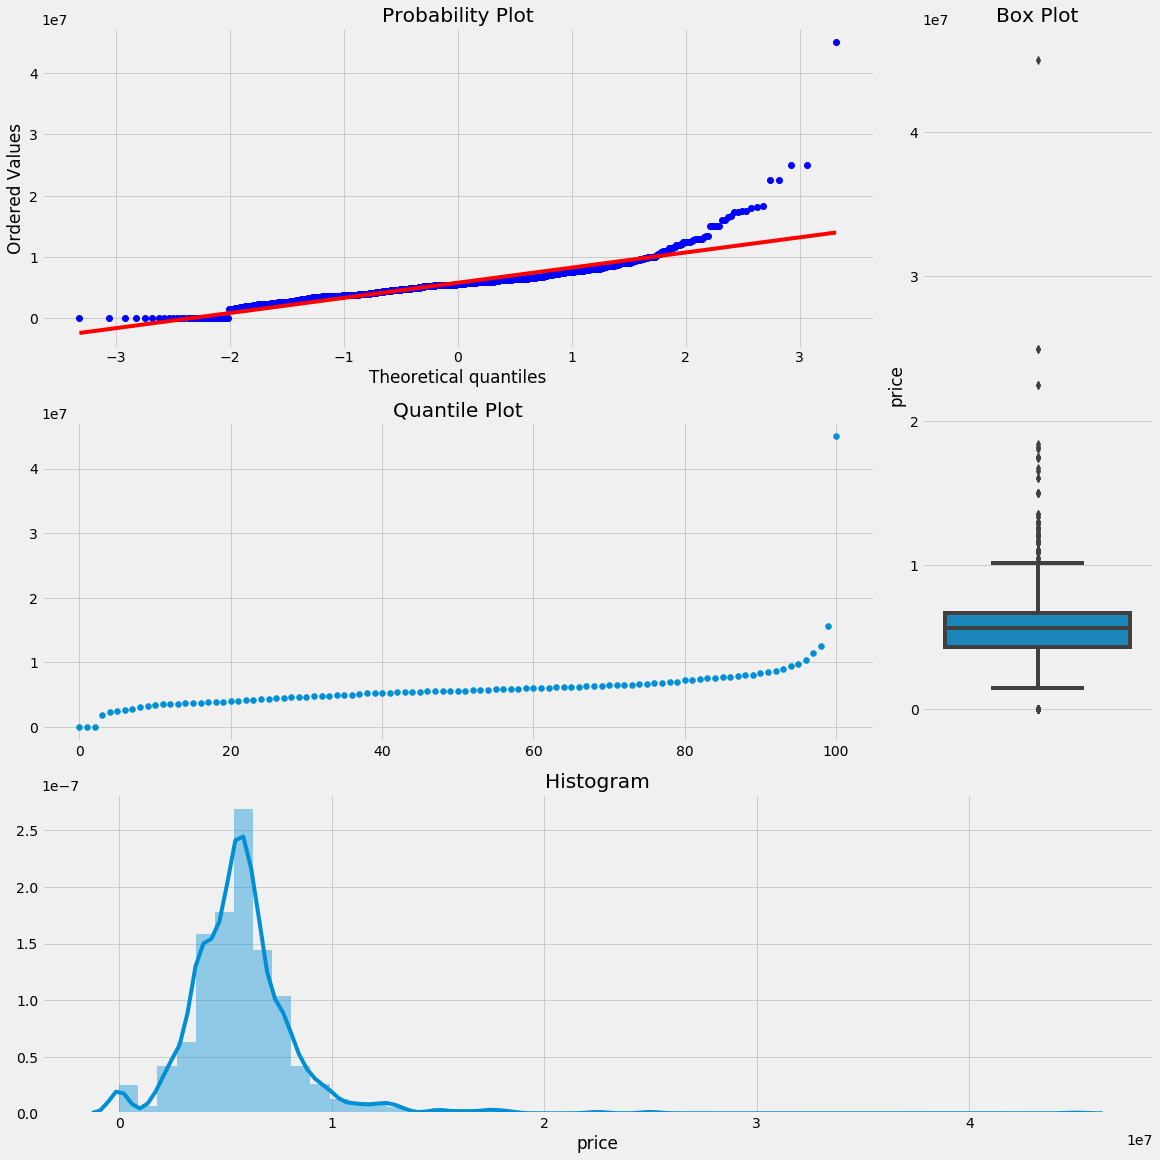

In [26]:
   
plotting_3_chart(df1, 'price')


<div class="alert alert-block alert-danger">
These <b>three</b> charts above can tell us a lot about our target variable.

* Our target variable, price is not normally distributed.
* Not unimodal because We can observe some value at zero price.
* Our target variable is right-skewed which means that most of the house's price are less the average of all the house price in chandigarh.
* There are multiple outliers in the variable which means that there are some houses whose values are extremely high.
* After approx 1.5 Cr rupee we can notice a complete flat line that is causing skewness in data.
</div>

In [27]:
print(f'There are {len(df1[price==0])} no. 1of entries whose prices are given zero so we will be dropping those records.')
df1 = df1[price!=0]

There are 34 no. 1of entries whose prices are given zero so we will be dropping those records.


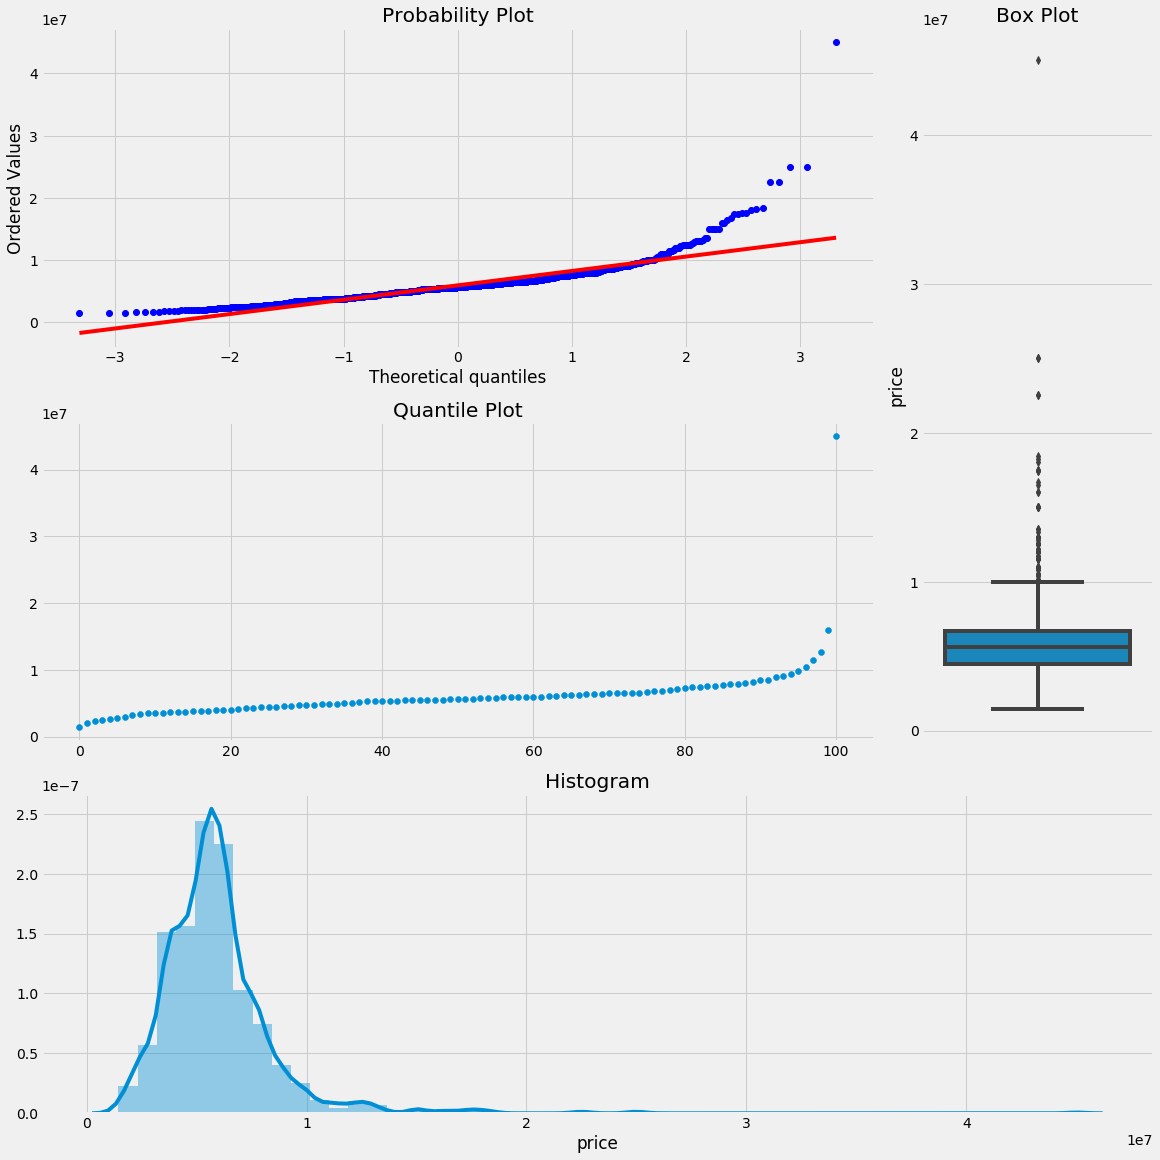

In [28]:
plotting_3_chart(df1, 'price')

## Skewness and Kurtosis

In [29]:
# skewness and kurtosis
print("Skewness: " + str(df1['price'].skew()))
print("Kurtosis: " + str(df1['price'].kurt()))

Skewness: 3.9608845156504717
Kurtosis: 39.47526920917823


<div class="alert alert-block alert-danger">

**Observations:**

***Skewness:***
* Positive Skewness(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter
* In positive Skewness the mean and median will be greater than the mode similar to this dataset. Which means more houses were sold by less than the average price.

***Kurtosis:***
* Kurtosis is the measure of the "tailedness" of the probability. distribution of a real-valued random variable. So, In other words, it is the measure of the extreme values(outliers) present in the distribution.
* A High kurtosis in House Prices in CHandigarh shows that there is risk in investment in house as same prices is paid for houses with different feature which means that if not bought wisely then buyer may not get the maximum they can get in the same price point.     
    
</div>

## Normal Distribution Conversion And dealing with skewness and kurtosis

Lets try finding a Normal Distribution by droping some Outliers with the help Quantile Plot and Skewness and Kurtosis. We have also seen that there is a normal distribution aound 1 Cr of the price value.

In [30]:
print("while observing i have noticed that the no. of houses available between price point of 1 Crore to 2 Crore rupee are",len(df1[price<=2e7]) - len(df1[price<=1e7]))

while observing i have noticed that the no. of houses available between price point of 1 Crore to 2 Crore rupee are 59


<div class="alert alert-block alert-warning">
There are very less records between price point of 10 to 20 Million Rupee and that might be causing all the error in achieving the normal distribution so we will do a log transform to achieve the normal distribution which is a assumption for Linear Regression.
</div>

In [31]:
df1.price = np.log(df1.price)

In [246]:
#creating a copy
df2 = df1.copy()

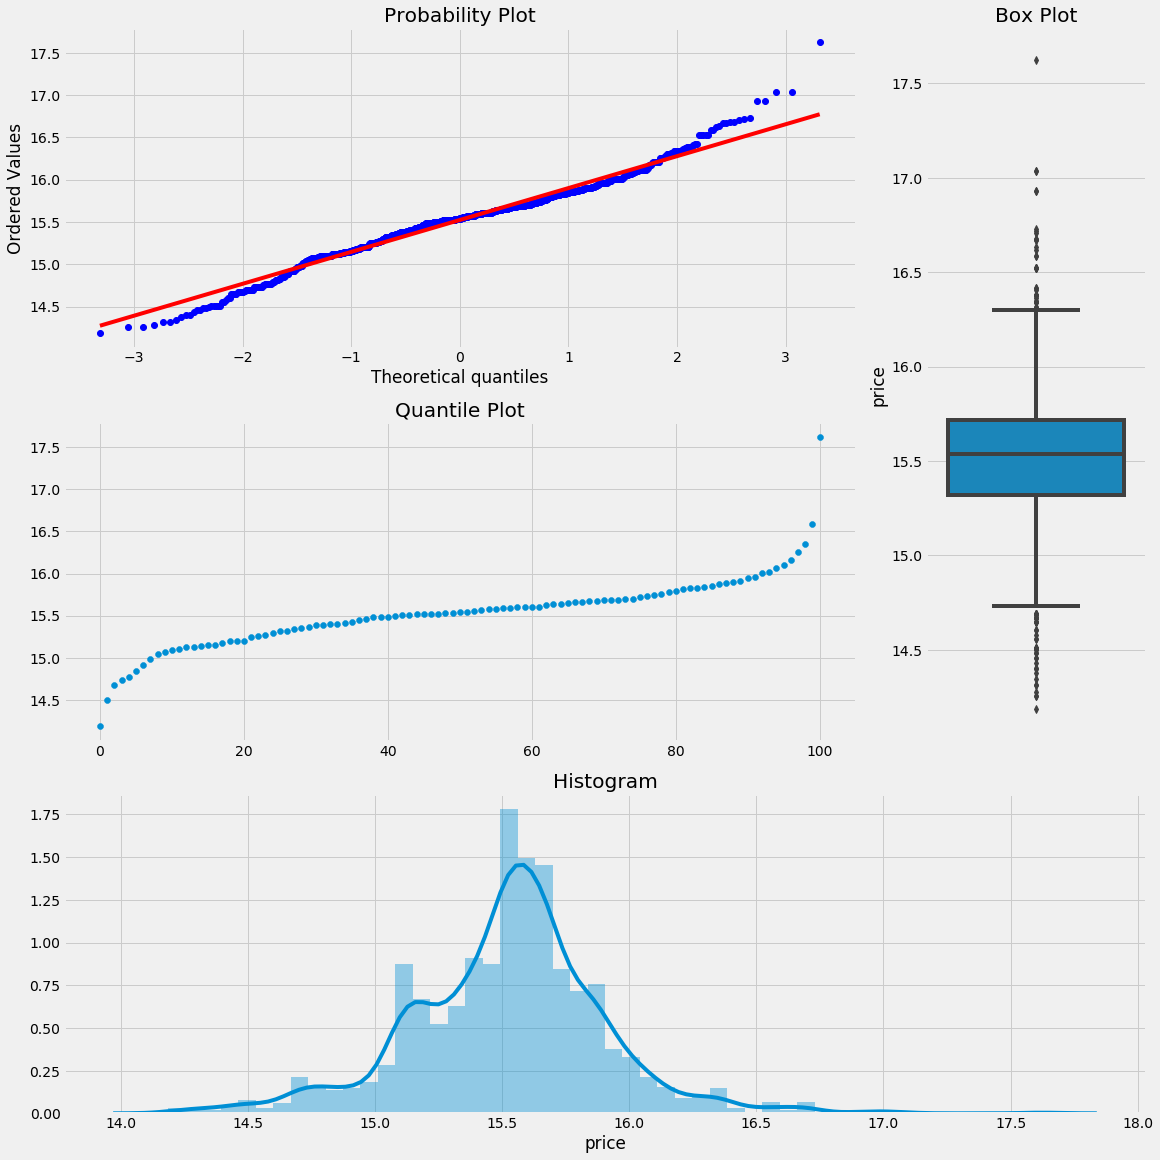

In [247]:
plotting_3_chart(df2,'price')

In [248]:
df2 = df2[df2.price <= df2.price.quantile(0.99)]

## Test for best distribution

In [35]:
from fitter import Fitter
f = Fitter(df2['price'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions


Fitted alpha distribution with error=8.9197175607581)
Fitted anglit distribution with error=17.062196747919003)
Fitted arcsine distribution with error=43.21994093629797)
Fitted argus distribution with error=25.909071796745433)
Fitted beta distribution with error=8.174965676607265)
Fitted betaprime distribution with error=24.944256724762724)
Fitted bradford distribution with error=26.31736879206685)
Fitted burr distribution with error=7.082800175748786)
Fitted burr12 distribution with error=7.390826862140443)
Fitted cauchy distribution with error=7.333994225039866)
Fitted chi distribution with error=8.69620545573438)
Fitted chi2 distribution with error=9.106830571106446)
Fitted cosine distribution with error=13.343368200681645)
Fitted crystalball distribution with error=8.583857859931333)
Fitted dgamma distribution with error=6.776463390831359)
Fitted dweibull distribution with error=6.789447726709584)
Fitted erlang distribution with error=8.929027390765391)
Fitted expon distribution wi

sumsquare_error         aic          bic  kl_div
laplace            6.706955  325.829281 -8010.829847     inf
loglaplace         6.736023  329.816394 -7997.099575     inf
dgamma             6.776463  331.870815 -7988.204865     inf
dweibull           6.789448  333.502257 -7985.360275     inf
gennorm            6.847897  335.102197 -7972.622383     inf

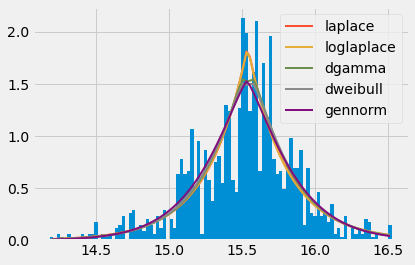

In [36]:
f.summary()

In [37]:
 f.fitted_param['gennorm']

(1.2568128515570178, 15.53281088010461, 0.3515126303080828)

<div class="alert alert-block alert-success">
The above test tries to fit the price of the apartments into various 80 distributions and calculates the error generated and awards the distribution with minimum error as the best distribution and from the above test i found that Finally we have achieved  a generalised normal distribution for our target variable with the error of 2.76 which is closest to a normally distributed data but we were unable to get the normal distribution showing that our data is not normally distributed so we will prefer using tree and probabilistic model for learning.
</div>

In [249]:
#removing duplicate records and keeping only one copy.
df2 = df2.drop_duplicates(keep='first')

In [250]:
df2.price = np.exp(df2.price)

# Analysis of Categorical Variables

In [40]:
cat_var = list(df2.columns.difference(['area','price']))
print('The list of categorical and ordinal variables are',', '.join(cat_var),'.')

The list of categorical and ordinal variables are area_type, balcony, bathroom, bhk_count, building_type, covered_parking, facing, floor_number, furnishing, open_parking, overlooking_garden_park, overlooking_main road, overlooking_none, overlooking_pool, ownership, parking, society, status, total_parking, transaction .


## area_type

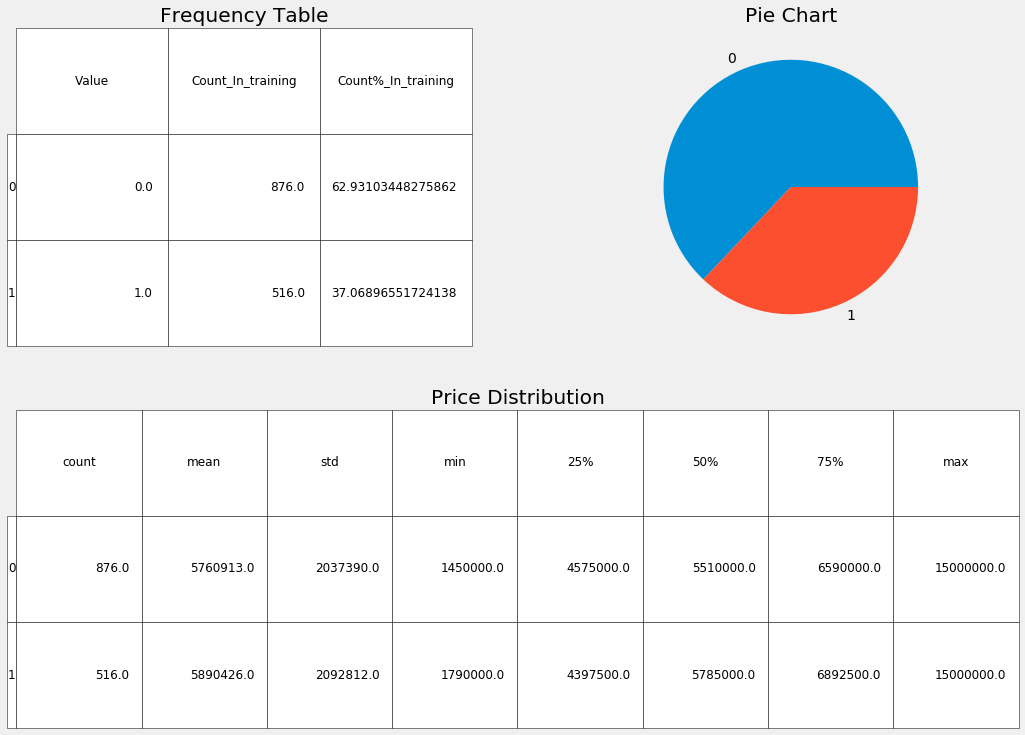

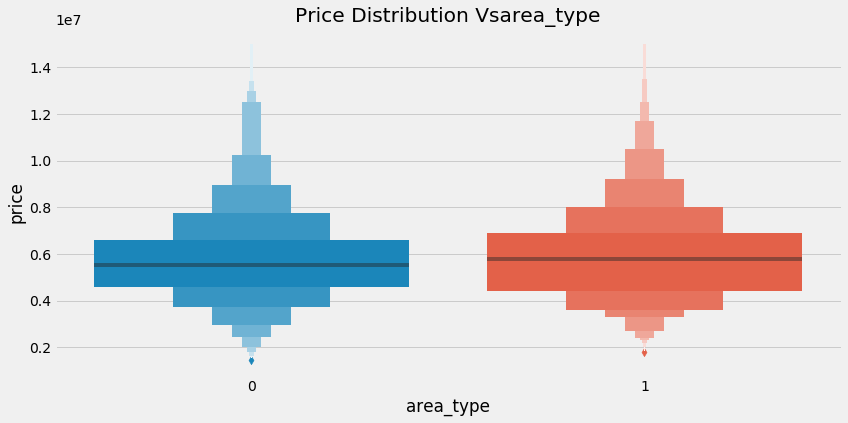

In [41]:
fn_ordinal_analysis(df2,'area_type')

<div class="alert alert-block alert-success">
<b>Carpet area:</b>
Carpet area is the area that can actually be covered by a carpet, or the area of the apartment excluding the thickness of inner walls. Carpet area does not include the space covered by common areas such as lobby, lift, stairs, play area, etc. Carpet area is the actual area you get for use in a housing unit. So when you are in search of a house, look at the carpet area and then make your decision, because that is the number that will give you an idea of the actual space at your disposal. Focusing on the carpet area will help you understand the usable area in the kitchen, bedroom, living room, etc. Nowadays, many builders do not even mention carpet area at first and usually charge on the basis of built-up area or super built-up area. Carpet area is usually around 70% of the built-up area.
    
<b>Super Area:</b>
Super area is a builder’s BFF! It is the area calculated by adding the built-up area and common area that includes the corridor, lift lobby, lift, etc. In some cases, builders even include amenities such as a pool, garden and clubhouse in the common area.  Selling on the basis of the super built-up area not only gives a wrong sense of the area of the house, but also reduces the per square feet cost of the house. A developer/builder charges you on the basis of the super built-up area which is why it is also known as ‘saleable’ area.
</div>

<div class="alert alert-block alert-warning">
The above piechart and frequency table explains that 38% apartments are mentioned with carpet area and 62.6% are mentioned with super area this shows that most sellers are mentioning the super area so that they can hide the real carpet area and can showcase that they are providing  the apartment with more areas with lower prices.
</div> 

Now we will verify the above said statement by comparing the distribution of prices using **kruskal wallis H test** :

In [42]:
var = [list(df2.groupby(by = 'area_type').groups[i]) for i in df2.groupby(by = 'area_type').groups]

In [43]:
fn_kruskal(var)

Kruskal Wallis H-test test:
H-statistic: 85.1150281245873
P-Value: 2.8150286410280236e-20
Reject NULL hypothesis - Significant differences exist between groups.


In [44]:
cat_var = list(df2.columns.difference(['price','area']))

## balcony

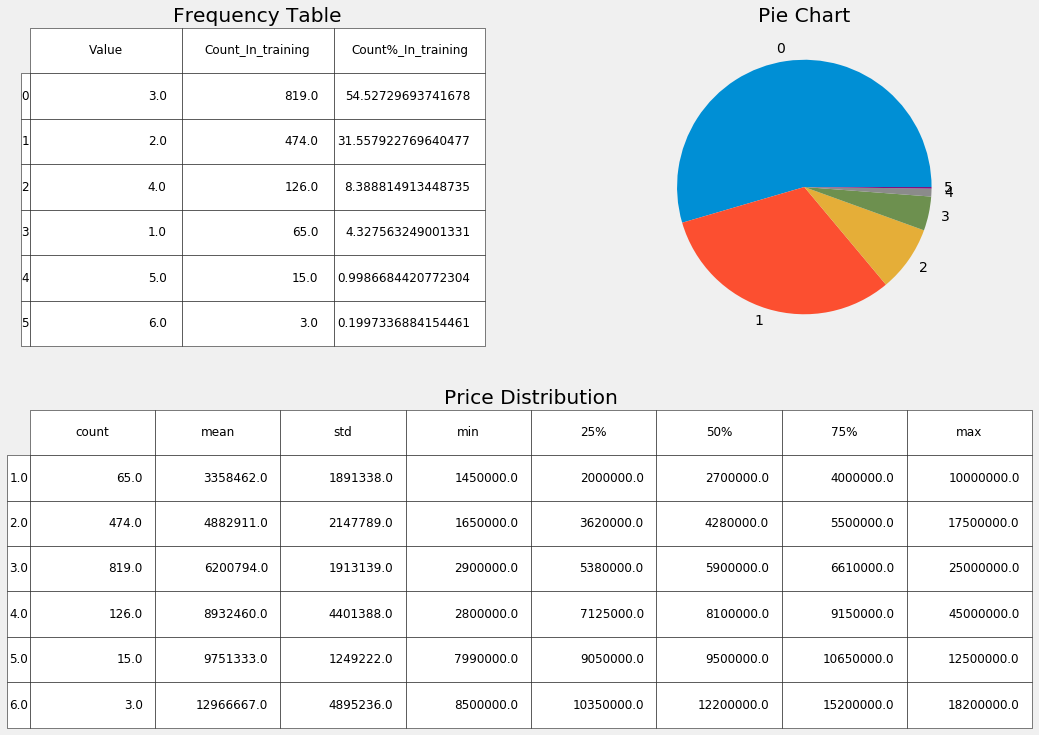

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4357: IntegrationWarning:

The integral is probably divergent, or slowly convergent.

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4357: IntegrationWarning:

The integral is probably divergent, or slowly convergent.



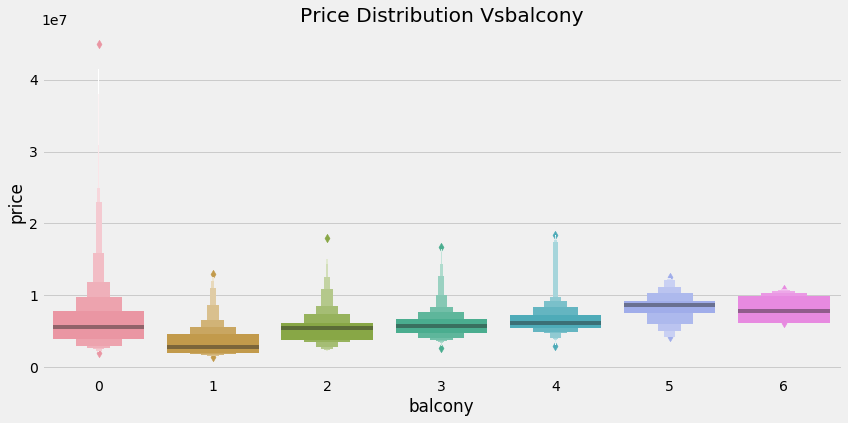

In [210]:
fn_ordinal_analysis(df2,'balcony')

<div class="alert alert-block alert-warning">
The maximum number of balcony available is 6 but there are only 4 houses available in Chandigarh with 6 balconies and also the range of price for apartment with no balcony is huge otherwise this feature is ordinal in nature such that if no of balconies increases from 1 to 5 then the mean of price also increases.
</div>

## bathroom

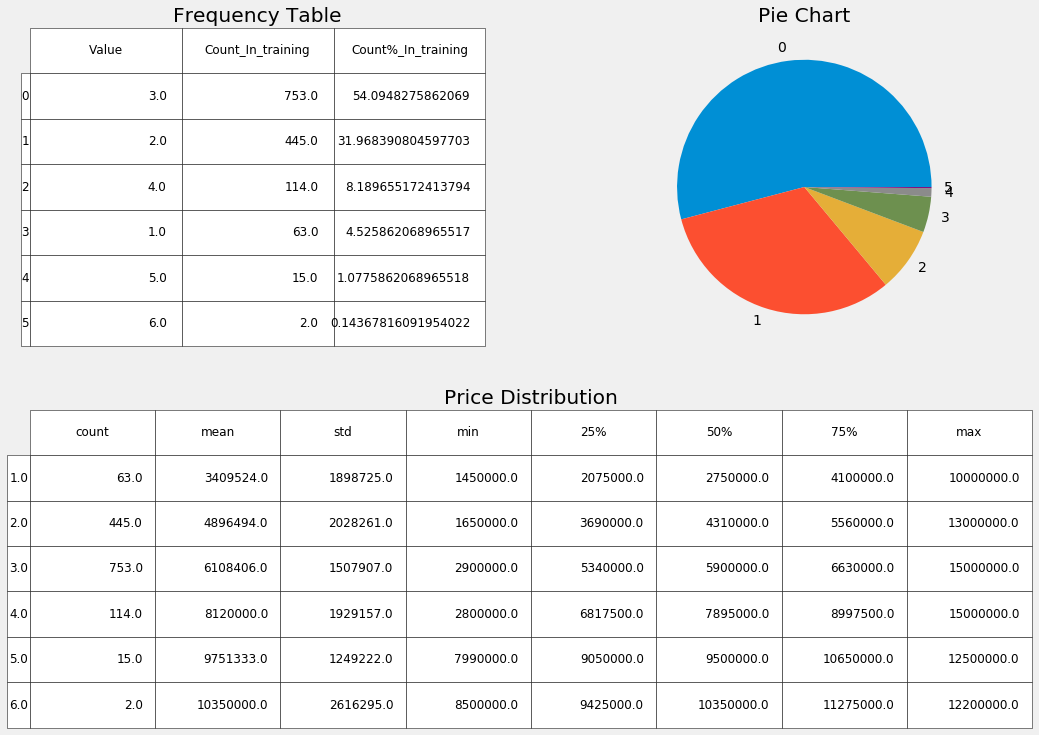

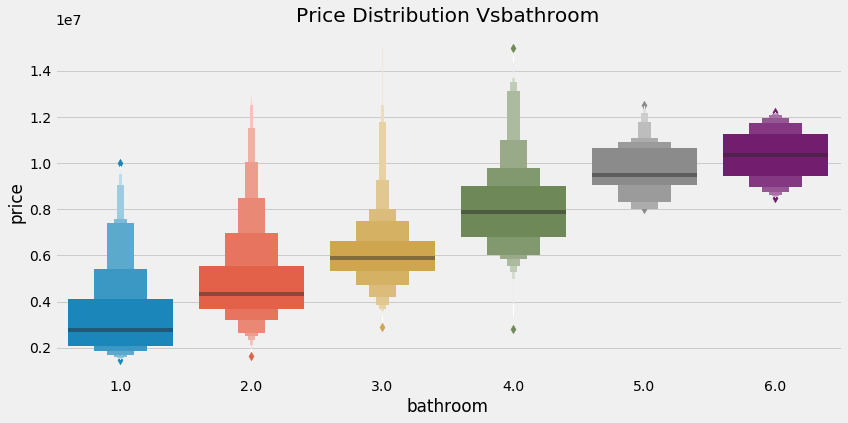

In [45]:
fn_ordinal_analysis(df2,'bathroom')

<div class="alert alert-block alert-warning">
The maximum number of bathrooms available are 6 this feature is ordinal in nature such that if no of bathrooms increases from 1 to 6 then the mean of prices also increases. There are only 3 Apartments which has 6 bathroom because maximum BHK apartment is 5.
</div>


## bhk_count

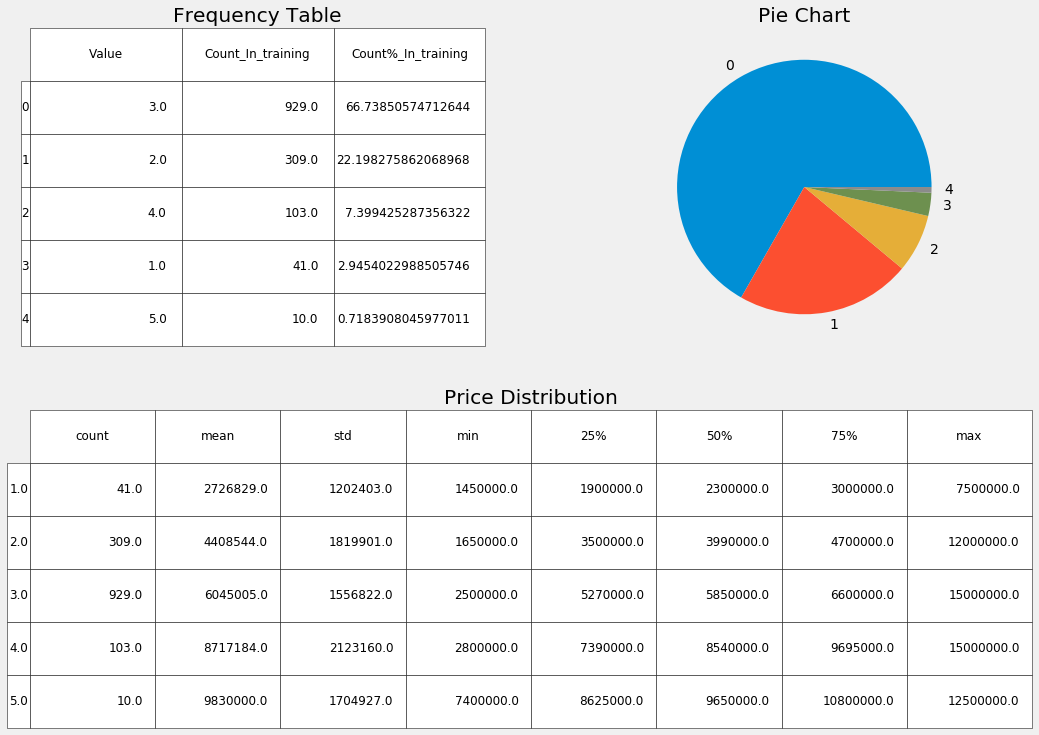

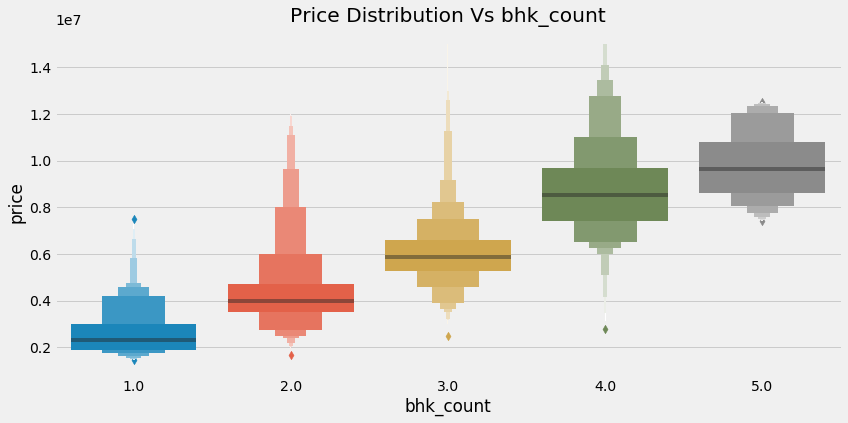

In [46]:
#frequency table for bhk_count

df_ = pd.DataFrame(
                                {'Value' :df2['bhk_count'].value_counts().index ,
                                 'Count_In_training' : df2['bhk_count'].value_counts().values, 
                                 'Count%_In_training' : df2['bhk_count'].value_counts(normalize=True).values * 100,}
                                )

x = round(df2.groupby('bhk_count')['price'].describe())

fig = plt.figure(figsize=(16,12))
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(222)
ax1.pie(df_['Count_In_training'],labels=df_.index)
ax1.title.set_text('Pie Chart')

ax2 = fig.add_subplot(221)
font_size=12
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = df_.values, rowLabels = df_.index, bbox=bbox, colLabels=df_.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
ax2.title.set_text('Frequency Table')

ax3 = fig.add_subplot(gs[1, :])
font_size=12
bbox=[0, 0, 1, 1]
ax3.axis('off')
mpl_table = ax3.table(cellText = x.values, rowLabels = x.index, bbox=bbox, colLabels=x.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
ax3.title.set_text('Price Distribution')
plt.show()

# bhk_count vs price
sns.catplot(y = "price", x = "bhk_count", data = df2.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 2)
plt.title("Price Distribution Vs bhk_count")
plt.show()


In [47]:
df2[['price','bhk_count']].corr(method='spearman')

price  bhk_count
price      1.000000   0.606656
bhk_count  0.606656   1.000000

## building_type

       Value  Count_In_training  Count%_In_training
0  Apartment               1392               100.0


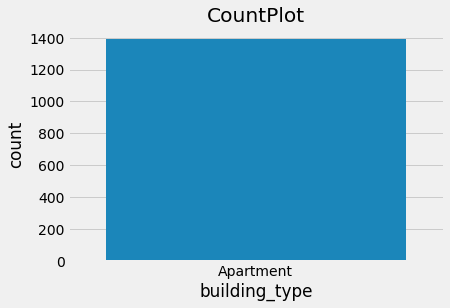

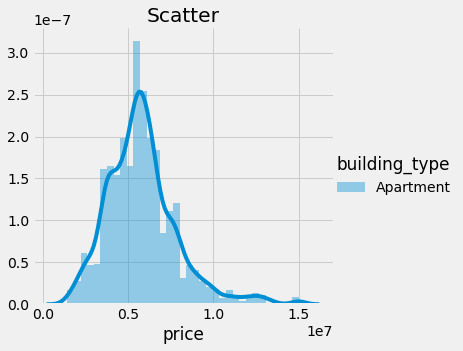

In [48]:
#frequency table for building_type

df_ = pd.DataFrame(
                                {'Value' :df2['building_type'].value_counts().index ,
                                 'Count_In_training' : df2['building_type'].value_counts().values, 
                                 'Count%_In_training' : df2['building_type'].value_counts(normalize=True).values * 100,}
                                )

print(df_)

sns.countplot(df2['building_type'])
plt.title('CountPlot')
plt.show()

sns.FacetGrid(df2,hue='building_type',height=5).map(sns.distplot,"price").add_legend()
plt.title('Scatter')
plt.show()

df2.drop('building_type',axis=1,inplace=True)
cat_var = list(df2.columns.difference(['building_type','price']))

## covered_parking 

   Value  Count_In_training  Count%_In_training
0      1                794           57.040230
1      0                562           40.373563
2      2                 30            2.155172
3      3                  3            0.215517
4      5                  2            0.143678
5      8                  1            0.071839


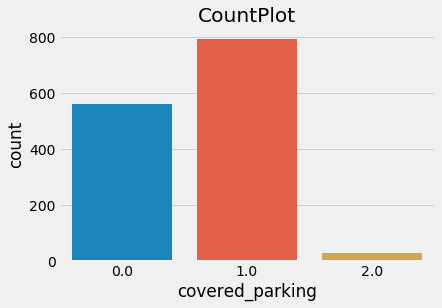

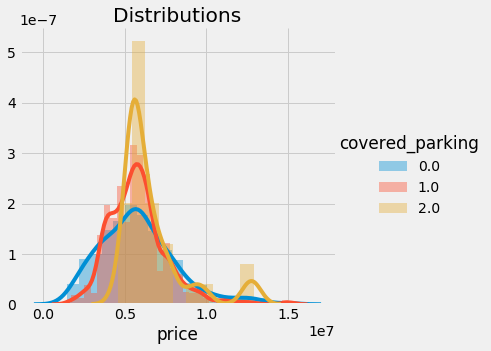

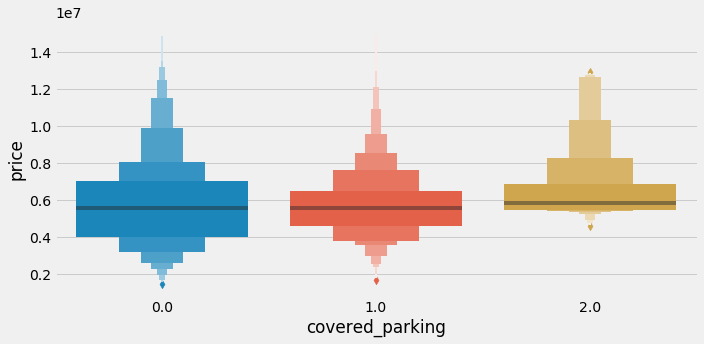

Kruskal Wallis H-test test:
H-statistic: 128.45862706861863
P-Value: 1.2751566955428445e-28
Reject NULL hypothesis - Significant differences exist between groups.


In [49]:
#frequency table for covered_parking

df_ = pd.DataFrame(
                                {'Value' :df2['covered_parking'].value_counts().index ,
                                 'Count_In_training' : df2['covered_parking'].value_counts().values, 
                                 'Count%_In_training' : df2['covered_parking'].value_counts(normalize=True).values * 100,}
                                )

print(df_)

x = list(df2['covered_parking'].value_counts().index[df2['covered_parking'].value_counts().values<5])
df2['covered_parking'] = [np.nan if i in x else i for i in df2['covered_parking']]
df2['covered_parking'].value_counts()

sns.countplot(df2['covered_parking'])
plt.title('CountPlot')
plt.show()

sns.FacetGrid(df2,hue='covered_parking',height=5).map(sns.distplot,"price").add_legend()
plt.title('Distributions')
plt.show()

# covered_parking vs price
sns.catplot(y = "price", x = "covered_parking", data = df2.sort_values("price", ascending = False), kind="boxen", height = 5, aspect = 2)
plt.show()

var = [list(df2.groupby(by = 'covered_parking').groups[i]) for i in df2.groupby(by = 'covered_parking').groups]
fn_kruskal(var)



## facing

        Value  Count_In_training  Count%_In_training
0        East                519           46.798918
1  North_East                438           39.495041
2       North                109            9.828674
3  North_West                 14            1.262399
4  South_East                  9            0.811542
5       South                  8            0.721371
6        West                  6            0.541028
7  South_West                  6            0.541028


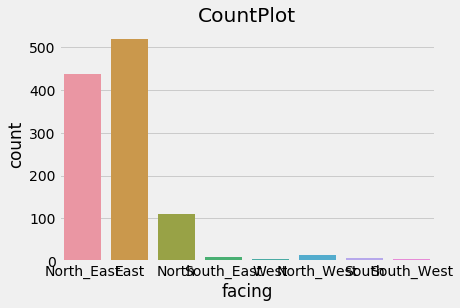

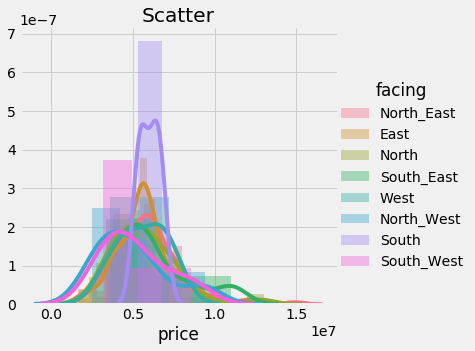

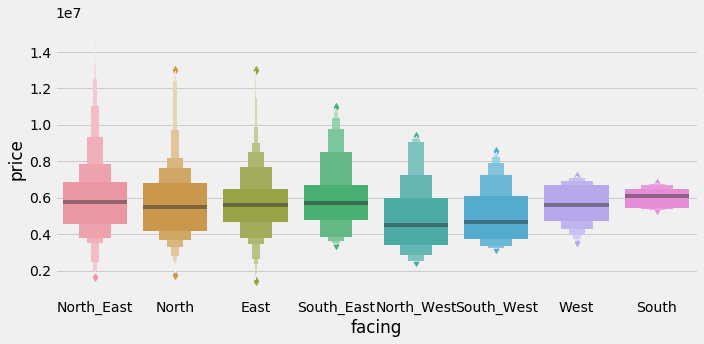

Kruskal Wallis H-test test:
H-statistic: 16.380447102605558
P-Value: 0.02185896455872039
Reject NULL hypothesis - Significant differences exist between groups.


In [50]:
#frequency table for facing

df_ = pd.DataFrame(
                                {'Value' :df2['facing'].value_counts().index ,
                                 'Count_In_training' : df2['facing'].value_counts().values, 
                                 'Count%_In_training' : df2['facing'].value_counts(normalize=True).values * 100,}
                                )

print(df_)

sns.countplot(df2['facing'])
plt.title('CountPlot')
plt.show()

sns.FacetGrid(df2,hue='facing',height=5).map(sns.distplot,"price").add_legend()
plt.title('Scatter')
plt.show()

# facing vs price
sns.catplot(y = "price", x = "facing", data = df2.sort_values("price", ascending = False), kind="boxen", height = 5, aspect = 2)
plt.show()


var = [list(df2.groupby(by = 'facing').groups[i]) for i in df2.groupby(by = 'facing').groups]
fn_kruskal(var)



## floor_number

             Value  Count_In_training  Count%_In_training
0                5                293           21.262700
1                2                243           17.634253
2                3                180           13.062409
3                4                152           11.030479
4                1                128            9.288824
5                6                 87            6.313498
6                7                 87            6.313498
7           Ground                 51            3.701016
8                8                 48            3.483309
9                9                 37            2.685051
10              10                 33            2.394775
11              11                 15            1.088534
12              12                  7            0.507983
13              15                  3            0.217707
14              16                  3            0.217707
15  Upper Basement                  2            0.145138
16            

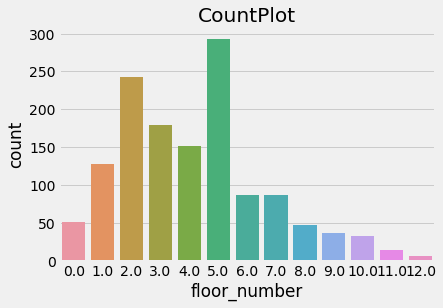

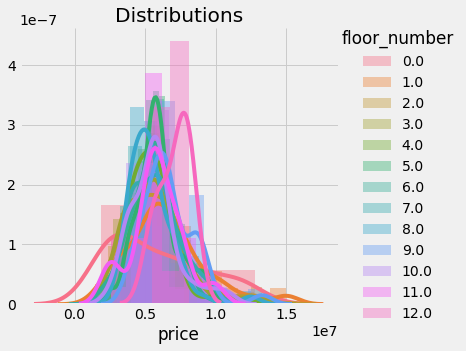

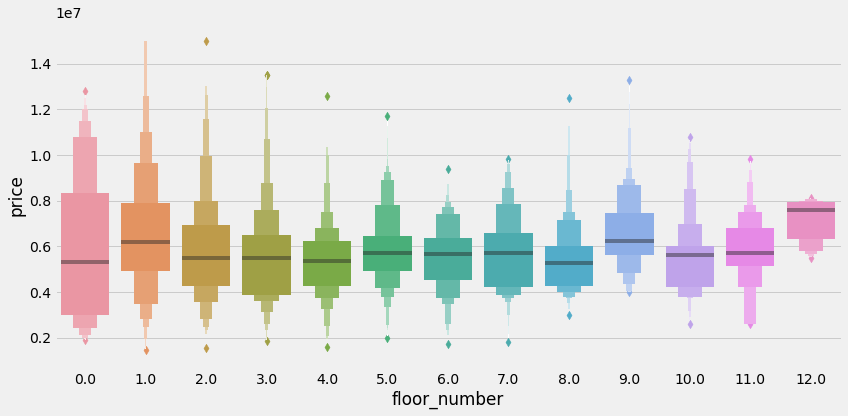

Kruskal Wallis H-test test:
H-statistic: 97.01503664390293
P-Value: 2.1353540594947038e-15
Reject NULL hypothesis - Significant differences exist between groups.


In [51]:
#frequency table for floor_number

df_ = pd.DataFrame(
                                {'Value' :df2['floor_number'].value_counts().index ,
                                 'Count_In_training' : df2['floor_number'].value_counts().values, 
                                 'Count%_In_training' : df2['floor_number'].value_counts(normalize=True).values * 100,}
                                )

print(df_)

x = list(df2['floor_number'].value_counts().index[df2['floor_number'].value_counts().values<5])
df2['floor_number'] = [np.nan if i in x else float(str(i).replace('Ground','0')) for i in df2['floor_number']]
df2['floor_number'].value_counts()

sns.countplot(df2['floor_number'])
plt.title('CountPlot')
plt.show()

sns.FacetGrid(df2,hue='floor_number',height=5).map(sns.distplot,"price").add_legend()
plt.title('Distributions')
plt.show()

# floor_number vs price
sns.catplot(y = "price", x = "floor_number", data = df2.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 2)
plt.show()

var = [list(df2.groupby(by = 'floor_number').groups[i]) for i in df2.groupby(by = 'floor_number').groups]
fn_kruskal(var)



## furnishing

            Value  Count_In_training  Count%_In_training
0  Semi_Furnished               1123           80.675287
1     Unfurnished                203           14.583333
2       Furnished                 66            4.741379


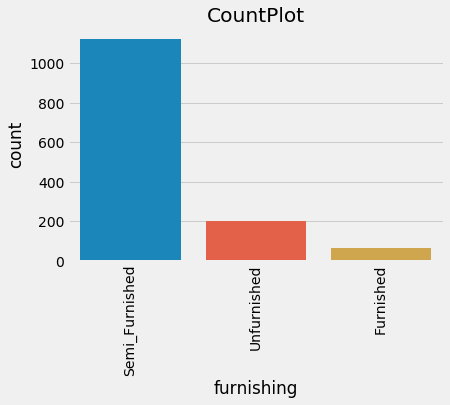

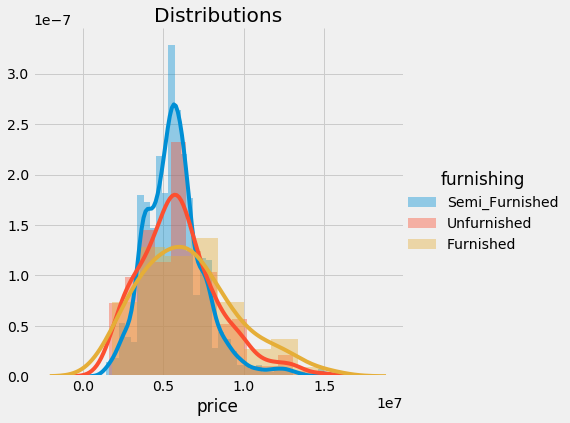

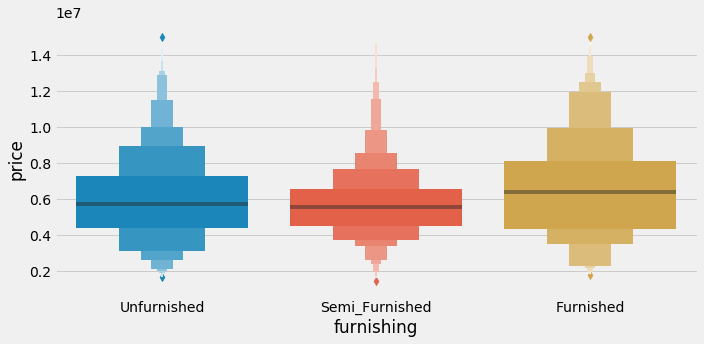

Kruskal Wallis H-test test:
H-statistic: 122.996695545281
P-Value: 1.9570725077720332e-27
Reject NULL hypothesis - Significant differences exist between groups.


In [52]:
#frequency table for furnishing

df_ = pd.DataFrame(
                                {'Value' :df2['furnishing'].value_counts().index ,
                                 'Count_In_training' : df2['furnishing'].value_counts().values, 
                                 'Count%_In_training' : df2['furnishing'].value_counts(normalize=True).values * 100,}
                                )

print(df_)

sns.countplot(df2['furnishing'])
plt.xticks(rotation=90)
plt.title('CountPlot')
plt.show()

sns.FacetGrid(df2,hue='furnishing',height=6).map(sns.distplot,"price").add_legend()
plt.title('Distributions')
plt.show()

# furnishing vs price
sns.catplot(y = "price", x = "furnishing", data = df2.sort_values("price", ascending = False), kind="boxen", height = 5, aspect = 2)
plt.show()

var = [list(df2.groupby(by = 'furnishing').groups[i]) for i in df2.groupby(by = 'furnishing').groups]
fn_kruskal(var)

## open_parking

   Value  Count_In_training  Count%_In_training
0      0               1037           74.497126
1      1                336           24.137931
2      2                 16            1.149425
3      5                  1            0.071839
4      4                  1            0.071839
5      3                  1            0.071839


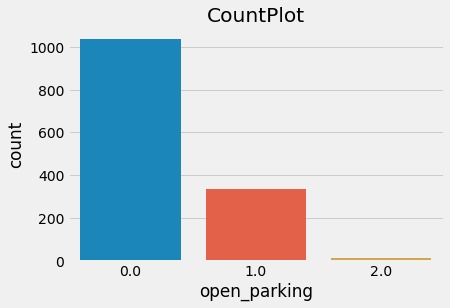

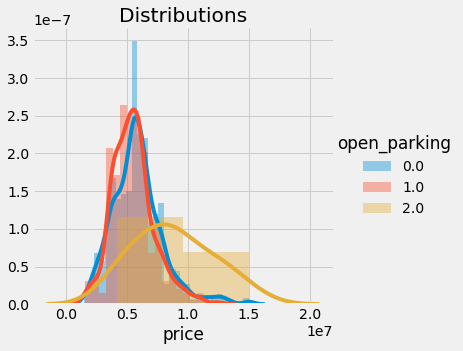

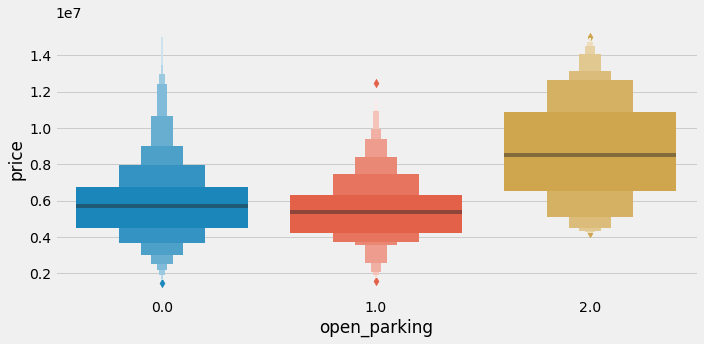

Kruskal Wallis H-test test:
H-statistic: 26.236916811224546
P-Value: 2.0078252122569153e-06
Reject NULL hypothesis - Significant differences exist between groups.


In [53]:
#frequency table for open_parking

df_ = pd.DataFrame(
                                {'Value' :df2['open_parking'].value_counts().index ,
                                 'Count_In_training' : df2['open_parking'].value_counts().values, 
                                 'Count%_In_training' : df2['open_parking'].value_counts(normalize=True).values * 100,}
                                )

print(df_)

x = list(df2['open_parking'].value_counts().index[df2['open_parking'].value_counts().values<5])
df2['open_parking'] = [np.nan if i in x else i for i in df2['open_parking']]
df2['open_parking'].value_counts()

sns.countplot(df2['open_parking'])
plt.title('CountPlot')
plt.show()

sns.FacetGrid(df2,hue='open_parking',height=5).map(sns.distplot,"price").add_legend()
plt.title('Distributions')
plt.show()

# open_parking vs price
sns.catplot(y = "price", x = "open_parking", data = df2.sort_values("price", ascending = False), kind="boxen", height = 5, aspect = 2)
plt.show()

var = [list(df2.groupby(by = 'open_parking').groups[i]) for i in df2.groupby(by = 'open_parking').groups]
fn_kruskal(var)

## overlooking_garden_park

   Value  Count_In_training  Count%_In_training
0      1                892            64.08046
1      0                500            35.91954


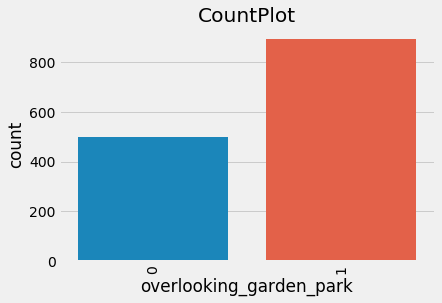

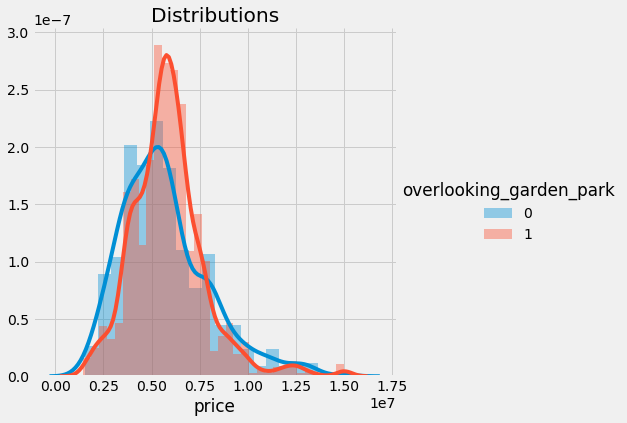

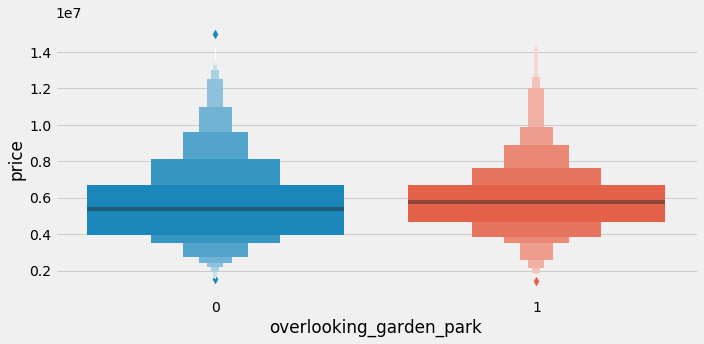

Kruskal Wallis H-test test:
H-statistic: 135.4412057919326
P-Value: 2.6438153975912143e-31
Reject NULL hypothesis - Significant differences exist between groups.


In [54]:
#frequency table for overlooking_garden_park

df_ = pd.DataFrame(
                                {'Value' :df2['overlooking_garden_park'].value_counts().index ,
                                 'Count_In_training' : df2['overlooking_garden_park'].value_counts().values, 
                                 'Count%_In_training' : df2['overlooking_garden_park'].value_counts(normalize=True).values * 100,}
                                )

print(df_)

sns.countplot(df2['overlooking_garden_park'])
plt.xticks(rotation=90)
plt.title('CountPlot')
plt.show()

sns.FacetGrid(df2,hue='overlooking_garden_park',height=6).map(sns.distplot,"price").add_legend()
plt.title('Distributions')
plt.show()

# overlooking_garden_park vs price
sns.catplot(y = "price", x = "overlooking_garden_park", data = df2.sort_values("price", ascending = False), kind="boxen", height = 5, aspect = 2)
plt.show()

var = [list(df2.groupby(by = 'overlooking_garden_park').groups[i]) for i in df2.groupby(by = 'overlooking_garden_park').groups]
fn_kruskal(var)

## overlooking_main road

   Value  Count_In_training  Count%_In_training
0      1                726           52.155172
1      0                666           47.844828


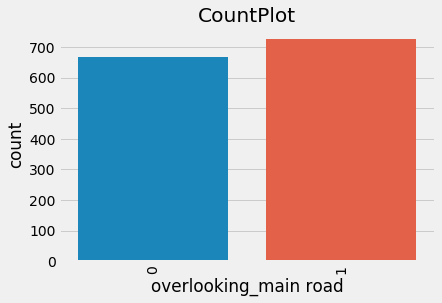

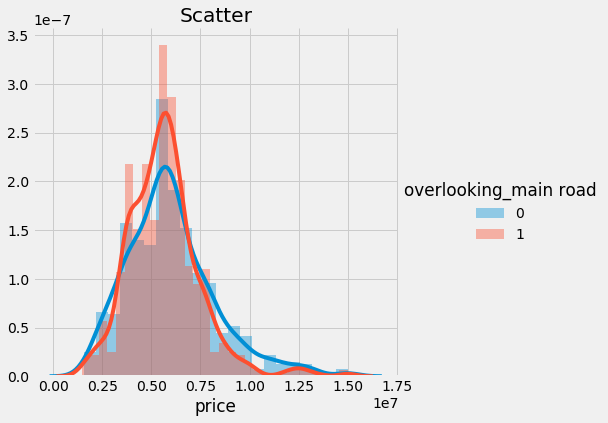

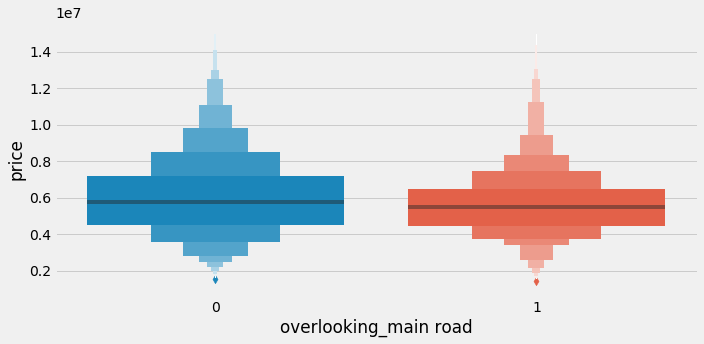

Kruskal Wallis H-test test:
H-statistic: 153.5408888862521
P-Value: 2.917855327704124e-35
Reject NULL hypothesis - Significant differences exist between groups.


In [55]:
#frequency table for overlooking_main road

df_ = pd.DataFrame(
                                {'Value' :df2['overlooking_main road'].value_counts().index ,
                                 'Count_In_training' : df2['overlooking_main road'].value_counts().values, 
                                 'Count%_In_training' : df2['overlooking_main road'].value_counts(normalize=True).values * 100,}
                                )

print(df_)

sns.countplot(df2['overlooking_main road'])
plt.xticks(rotation=90)
plt.title('CountPlot')
plt.show()

sns.FacetGrid(df2,hue='overlooking_main road',height=6).map(sns.distplot,"price").add_legend()
plt.title('Scatter')
plt.show()

# overlooking_main road vs price
sns.catplot(y = "price", x = "overlooking_main road", data = df2.sort_values("price", ascending = False), kind="boxen", height = 5, aspect = 2)
plt.show()

var = [list(df2.groupby(by = 'overlooking_main road').groups[i]) for i in df2.groupby(by = 'overlooking_main road').groups]
fn_kruskal(var)

## overlooking_none

   Value  Count_In_training  Count%_In_training
0      0               1072           77.011494
1      1                320           22.988506


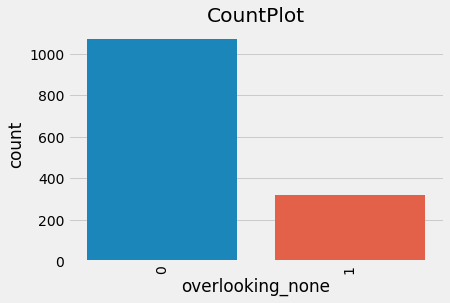

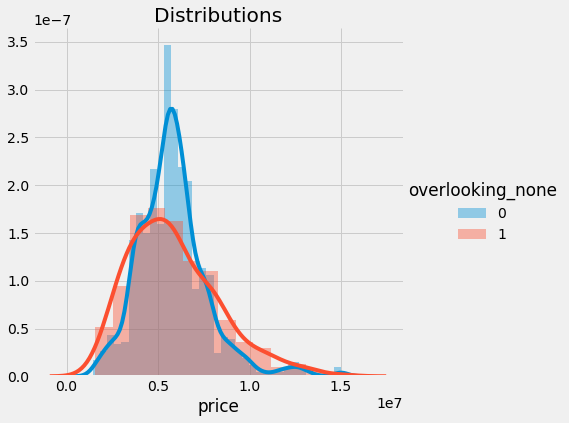

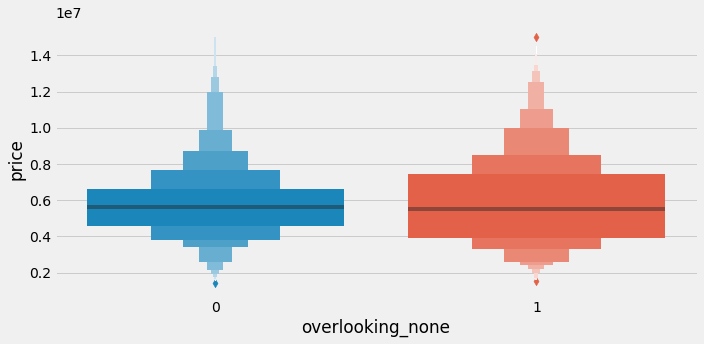

Kruskal Wallis H-test test:
H-statistic: 231.98434024466678
P-Value: 2.2008932156585893e-52
Reject NULL hypothesis - Significant differences exist between groups.


In [56]:
#frequency table for overlooking_none

df_ = pd.DataFrame(
                                {'Value' :df2['overlooking_none'].value_counts().index ,
                                 'Count_In_training' : df2['overlooking_none'].value_counts().values, 
                                 'Count%_In_training' : df2['overlooking_none'].value_counts(normalize=True).values * 100,}
                                )

print(df_)

sns.countplot(df2['overlooking_none'])
plt.xticks(rotation=90)
plt.title('CountPlot')
plt.show()

sns.FacetGrid(df2,hue='overlooking_none',height=6).map(sns.distplot,"price").add_legend()
plt.title('Distributions')
plt.show()

# overlooking_none vs price
sns.catplot(y = "price", x = "overlooking_none", data = df2.sort_values("price", ascending = False), kind="boxen", height = 5, aspect = 2)
plt.show()

var = [list(df2.groupby(by = 'overlooking_none').groups[i]) for i in df2.groupby(by = 'overlooking_none').groups]
fn_kruskal(var)

## overlooking_pool

   Value  Count_In_training  Count%_In_training
0      0               1037           74.497126
1      1                355           25.502874


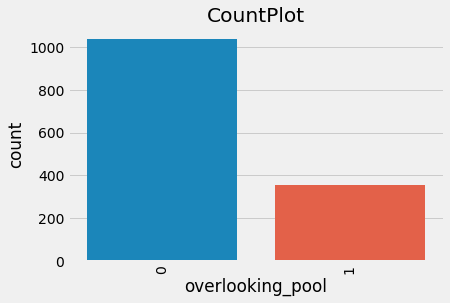

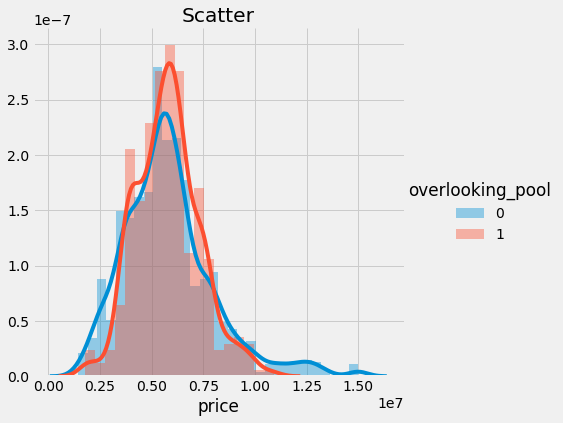

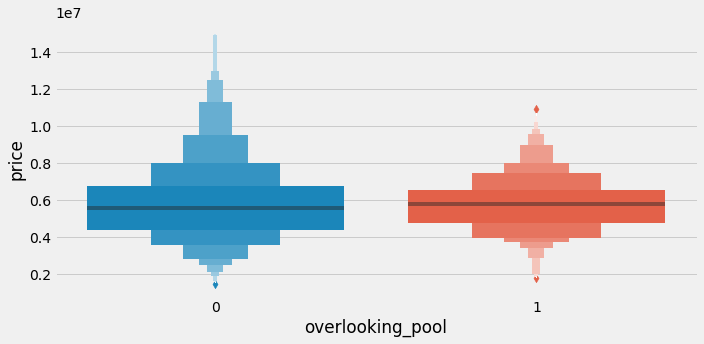

Kruskal Wallis H-test test:
H-statistic: 62.94774229322684
P-Value: 2.1226422424597118e-15
Reject NULL hypothesis - Significant differences exist between groups.


In [57]:
#frequency table for overlooking_pool

df_ = pd.DataFrame(
                                {'Value' :df2['overlooking_pool'].value_counts().index ,
                                 'Count_In_training' : df2['overlooking_pool'].value_counts().values, 
                                 'Count%_In_training' : df2['overlooking_pool'].value_counts(normalize=True).values * 100,}
                                )

print(df_)

sns.countplot(df2['overlooking_pool'])
plt.xticks(rotation=90)
plt.title('CountPlot')
plt.show()

sns.FacetGrid(df2,hue='overlooking_pool',height=6).map(sns.distplot,"price").add_legend()
plt.title('Scatter')
plt.show()

# overlooking_pool vs price
sns.catplot(y = "price", x = "overlooking_pool", data = df2.sort_values("price", ascending = False), kind="boxen", height = 5, aspect = 2)
plt.show()

var = [list(df2.groupby(by = 'overlooking_pool').groups[i]) for i in df2.groupby(by = 'overlooking_pool').groups]
fn_kruskal(var)

## ownership

                  Value  Count_In_training  Count%_In_training
0              Freehold               1122           98.334794
1             Leasehold                 13            1.139351
2     Power_Of_Attorney                  4            0.350570
3  Co_operative_Society                  2            0.175285


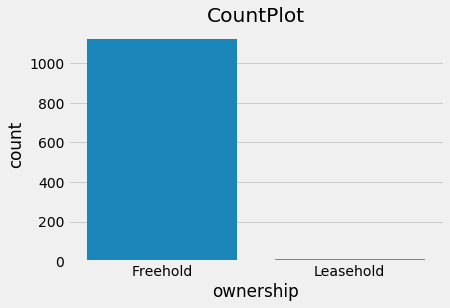

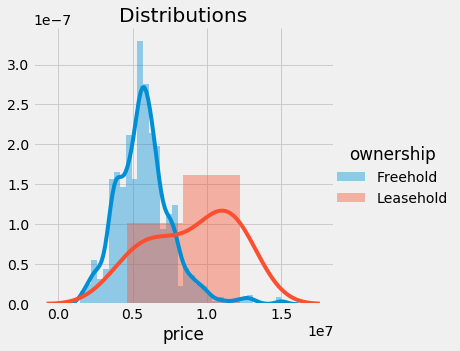

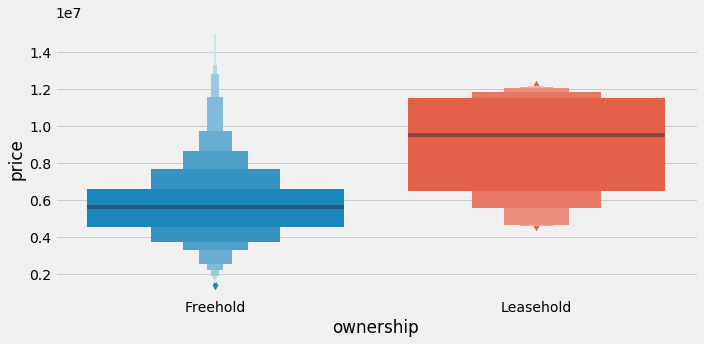

Kruskal Wallis H-test test:
H-statistic: 10.568015249042674
P-Value: 0.0011506119826604918
Reject NULL hypothesis - Significant differences exist between groups.


In [58]:
#frequency table for ownership

df_ = pd.DataFrame(
                                {'Value' :df2['ownership'].value_counts().index ,
                                 'Count_In_training' : df2['ownership'].value_counts().values, 
                                 'Count%_In_training' : df2['ownership'].value_counts(normalize=True).values * 100,}
                                )

print(df_)

x = list(df2['ownership'].value_counts().index[df2['ownership'].value_counts().values<5])
df2['ownership'] = [np.nan if i in x else i for i in df2['ownership']]
df2['ownership'].value_counts()

sns.countplot(df2['ownership'])
plt.title('CountPlot')
plt.show()

sns.FacetGrid(df2,hue='ownership',height=5).map(sns.distplot,"price").add_legend()
plt.title('Distributions')
plt.show()

# ownership vs price
sns.catplot(y = "price", x = "ownership", data = df2.sort_values("price", ascending = False), kind="boxen", height = 5, aspect = 2)
plt.show()


var = [list(df2.groupby(by = 'ownership').groups[i]) for i in df2.groupby(by = 'ownership').groups]
fn_kruskal(var)

In [59]:
df2.drop('ownership',axis=1,inplace=True)

## parking

   Value  Count_In_training  Count%_In_training
0      1                913            65.58908
1      0                479            34.41092


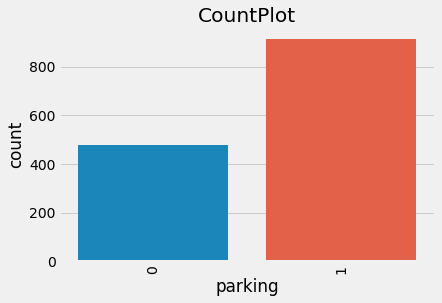

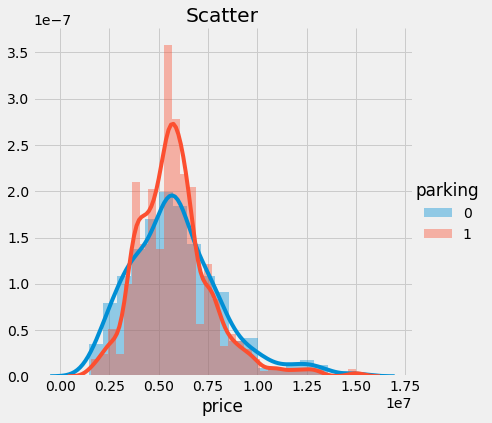

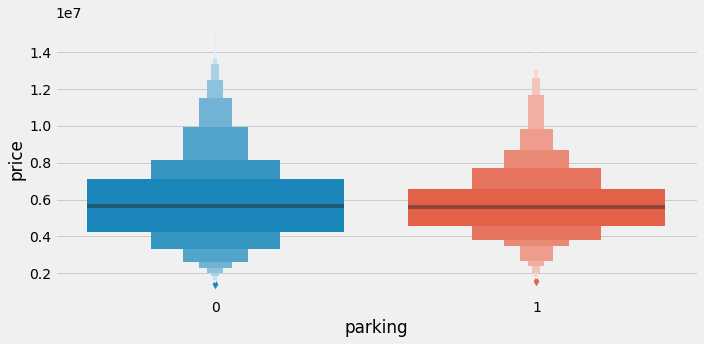

Kruskal Wallis H-test test:
H-statistic: 108.14234483197833
P-Value: 2.5015159177488846e-25
Reject NULL hypothesis - Significant differences exist between groups.


In [60]:
#frequency table for parking

df_ = pd.DataFrame(
                                {'Value' :df2['parking'].value_counts().index ,
                                 'Count_In_training' : df2['parking'].value_counts().values, 
                                 'Count%_In_training' : df2['parking'].value_counts(normalize=True).values * 100,}
                                )

print(df_)

sns.countplot(df2['parking'])
plt.xticks(rotation=90)
plt.title('CountPlot')
plt.show()

sns.FacetGrid(df2,hue='parking',height=6).map(sns.distplot,"price").add_legend()
plt.title('Scatter')
plt.show()

# parking vs price
sns.catplot(y = "price", x = "parking", data = df2.sort_values("price", ascending = False), kind="boxen", height = 5, aspect = 2)
plt.show()

var = [list(df2.groupby(by = 'parking').groups[i]) for i in df2.groupby(by = 'parking').groups]
fn_kruskal(var)

## society

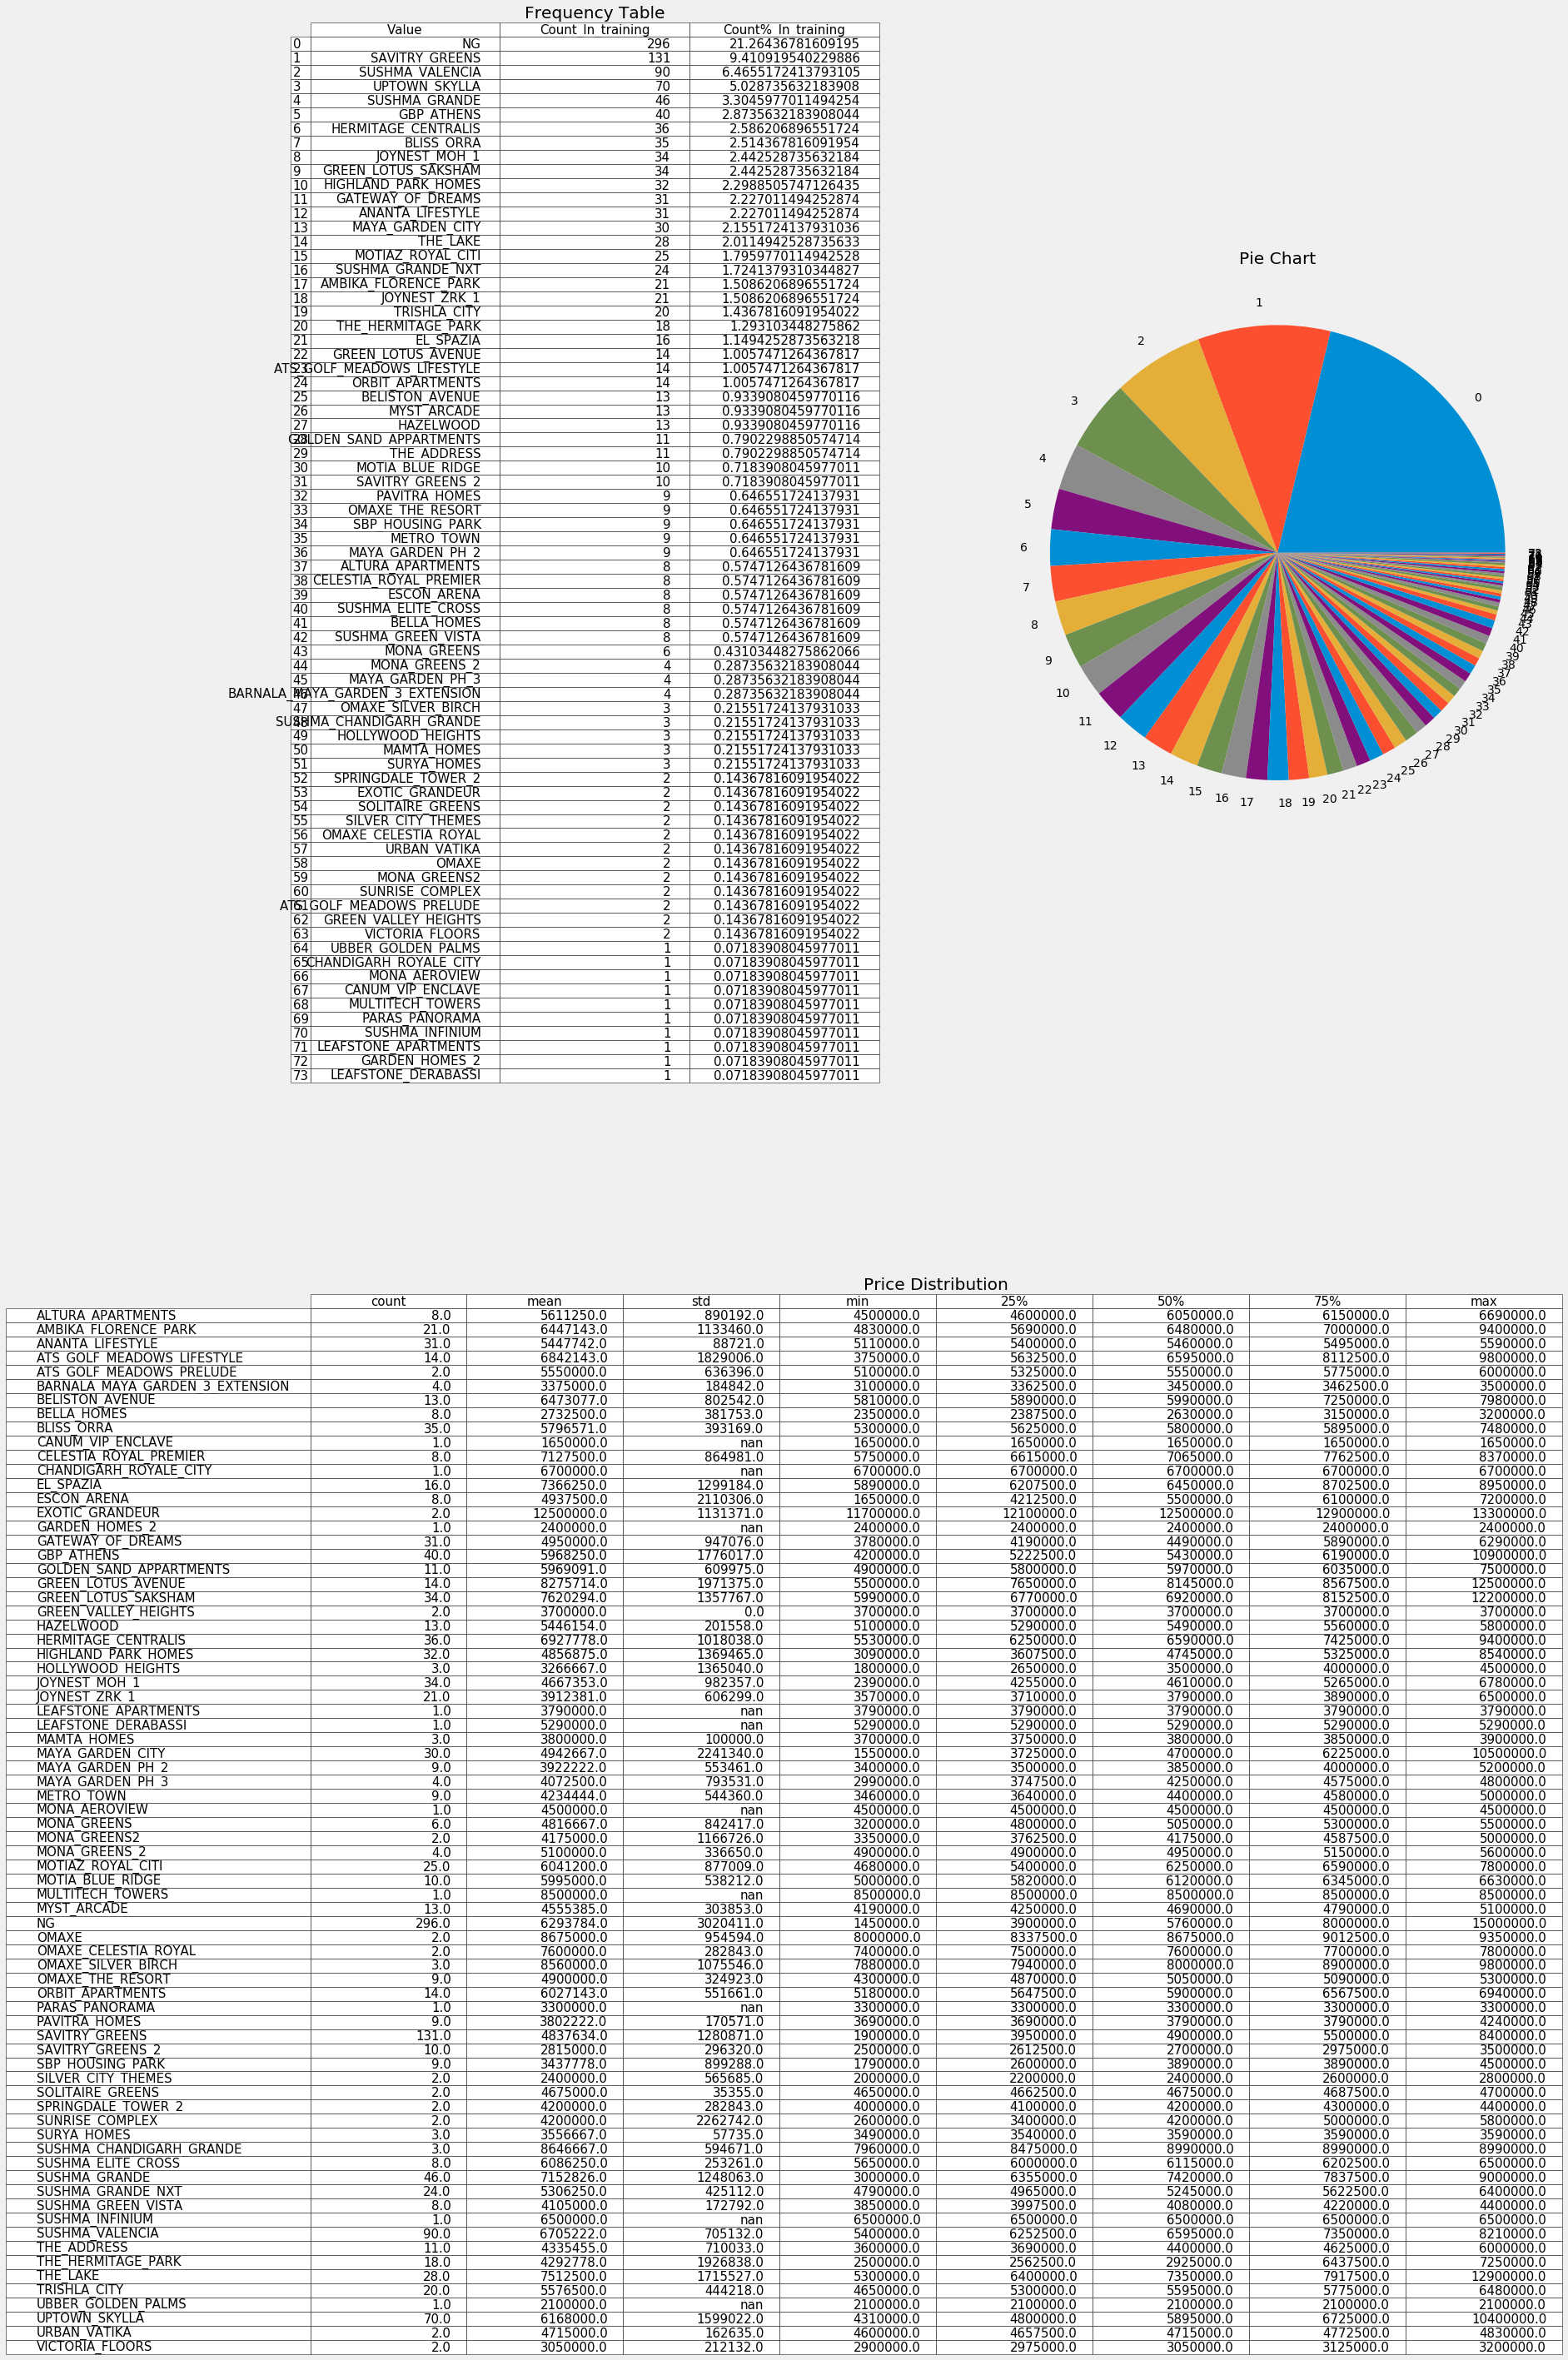

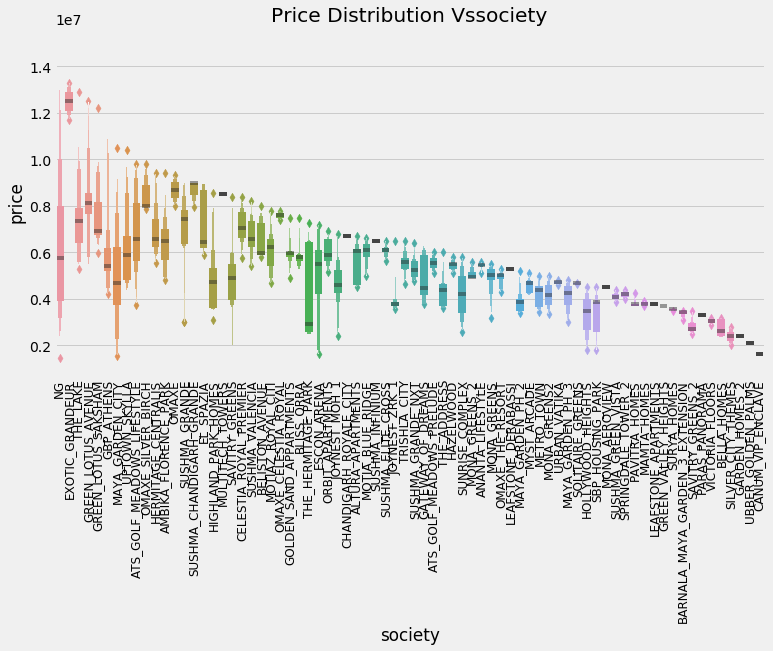

In [252]:
feature = 'society'

df_ = pd.DataFrame(
                                {'Value' :df2[feature].value_counts().index ,
                                 'Count_In_training' : df2[feature].value_counts().values, 
                                 'Count%_In_training' : df2[feature].value_counts(normalize=True).values * 100,}
                                )

x = round(df2.groupby(feature)['price'].describe())

fig = plt.figure(figsize=(24,48))
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(222)
ax1.pie(df_['Count_In_training'],labels=df_.index)
ax1.title.set_text('Pie Chart')

ax2 = fig.add_subplot(221)
font_size=15
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = df_.values, rowLabels = df_.index, bbox=bbox, colLabels=df_.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
ax2.title.set_text('Frequency Table')

ax3 = fig.add_subplot(gs[1, :])
font_size=15
bbox=[0, 0, 1, 1]
ax3.axis('off')
mpl_table = ax3.table(cellText = x.values, rowLabels = x.index, bbox=bbox, colLabels=x.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
ax3.title.set_text('Price Distribution')
plt.show()

# bathroom vs price
sns.catplot(y = "price", x = feature, data = df2.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 2)
plt.title(str("Price Distribution Vs" + feature))
plt.xticks(rotation = 90,size=12)
plt.show()

In [253]:
x = list(df2['society'].value_counts().index[df2['society'].value_counts().values<5])
df2['society'] = ['others' if i in x else i for i in df2['society']]
df2['society'].value_counts()

var = [list(df2.groupby(by = 'society').groups[i]) for i in df2.groupby(by = 'society').groups]
fn_kruskal(var)

Kruskal Wallis H-test test:
H-statistic: 375.3163117854183
P-Value: 3.843154152825722e-54
Reject NULL hypothesis - Significant differences exist between groups.


In [259]:
df2.columns

Index(['transaction', 'balcony', 'bathroom', 'ownership', 'society', 'status',
       'facing', 'furnishing', 'price', 'overlooking_garden_park',
       'overlooking_none', 'overlooking_pool', 'overlooking_main road',
       'area_type', 'area', 'covered_parking', 'open_parking', 'total_parking',
       'parking', 'floor_number', 'building_type', 'bhk_count'],
      dtype='object')

In [260]:
sprays = df2.to_numpy()
alpha = 0.05
k = len(np.unique(sprays[:,4]))

In [261]:
import numpy_indexed as npi
from hypothetical.descriptive import var
from itertools import combinations


group_means = dict(npi.group_by(sprays[:, 4], sprays[:, 8], np.mean))
group_obs = dict(npi.group_by(sprays[:, 4], sprays[:, 8], len))
group_variance = dict(npi.group_by(sprays[:, 4], sprays[:, 8], var))

combs = list(combinations(np.unique(sprays[:, 4]), 2))
combs

[('ALTURA_APARTMENTS', 'AMBIKA_FLORENCE_PARK'),
 ('ALTURA_APARTMENTS', 'ANANTA_LIFESTYLE'),
 ('ALTURA_APARTMENTS', 'ATS_GOLF_MEADOWS_LIFESTYLE'),
 ('ALTURA_APARTMENTS', 'BELISTON_AVENUE'),
 ('ALTURA_APARTMENTS', 'BELLA_HOMES'),
 ('ALTURA_APARTMENTS', 'BLISS_ORRA'),
 ('ALTURA_APARTMENTS', 'CELESTIA_ROYAL_PREMIER'),
 ('ALTURA_APARTMENTS', 'EL_SPAZIA'),
 ('ALTURA_APARTMENTS', 'ESCON_ARENA'),
 ('ALTURA_APARTMENTS', 'GATEWAY_OF_DREAMS'),
 ('ALTURA_APARTMENTS', 'GBP_ATHENS'),
 ('ALTURA_APARTMENTS', 'GOLDEN_SAND_APPARTMENTS'),
 ('ALTURA_APARTMENTS', 'GREEN_LOTUS_AVENUE'),
 ('ALTURA_APARTMENTS', 'GREEN_LOTUS_SAKSHAM'),
 ('ALTURA_APARTMENTS', 'HAZELWOOD'),
 ('ALTURA_APARTMENTS', 'HERMITAGE_CENTRALIS'),
 ('ALTURA_APARTMENTS', 'HIGHLAND_PARK_HOMES'),
 ('ALTURA_APARTMENTS', 'JOYNEST_MOH_1'),
 ('ALTURA_APARTMENTS', 'JOYNEST_ZRK_1'),
 ('ALTURA_APARTMENTS', 'MAYA_GARDEN_CITY'),
 ('ALTURA_APARTMENTS', 'MAYA_GARDEN_PH_2'),
 ('ALTURA_APARTMENTS', 'METRO_TOWN'),
 ('ALTURA_APARTMENTS', 'MONA_GREENS'),
 ('

In [263]:
from statsmodels.stats.libqsturng import qsturng, psturng

group_comps = []
mean_differences = []
degrees_freedom = []
t_values = []
p_values = []
std_err = []
up_conf = []
low_conf = []

for comb in combs:
    # Mean differences of each group combination
    diff = group_means[comb[1]] - group_means[comb[0]]
    
    # t-value of each group combination
    t_val = np.abs(diff) / np.sqrt((group_variance[comb[0]] / group_obs[comb[0]]) + 
                                   (group_variance[comb[1]] / group_obs[comb[1]]))
    
    # Numerator of the Welch-Satterthwaite equation
    df_num = (group_variance[comb[0]] / group_obs[comb[0]] + group_variance[comb[1]] / group_obs[comb[1]]) ** 2
    
    # Denominator of the Welch-Satterthwaite equation
    df_denom = ((group_variance[comb[0]] / group_obs[comb[0]]) ** 2 / (group_obs[comb[0]] - 1) +
                (group_variance[comb[1]] / group_obs[comb[1]]) ** 2 / (group_obs[comb[1]] - 1))
    
    # Degrees of freedom
    df = df_num / df_denom
    
    # p-value of the group comparison
    p_val = psturng(t_val * np.sqrt(2), k, df)

    # Standard error of each group combination
    se = np.sqrt(0.5 * (group_variance[comb[0]] / group_obs[comb[0]] + 
                        group_variance[comb[1]] / group_obs[comb[1]]))
    
    # Upper and lower confidence intervals
    upper_conf = diff + qsturng(1 - alpha, k, df)
    lower_conf = diff - qsturng(1 - alpha, k, df)
    
    # Append the computed values to their respective lists.
    mean_differences.append(diff)
    degrees_freedom.append(df)
    t_values.append(t_val)
    p_values.append(p_val)
    std_err.append(se)
    up_conf.append(upper_conf)
    low_conf.append(lower_conf)
    group_comps.append(str(comb[0]) + ' : ' + str(comb[1]))

In [264]:
result_df = pd.DataFrame({'groups': group_comps,
                          'mean_difference': mean_differences,
                          'std_error': std_err,
                          't_value': t_values,
                          'p_value': p_values,
                          'upper_limit': up_conf,
                          'lower limit': low_conf})

result_df

groups  mean_difference  \
0          ALTURA_APARTMENTS : AMBIKA_FLORENCE_PARK     8.358929e+05   
1              ALTURA_APARTMENTS : ANANTA_LIFESTYLE    -1.635081e+05   
2    ALTURA_APARTMENTS : ATS_GOLF_MEADOWS_LIFESTYLE     1.230893e+06   
3               ALTURA_APARTMENTS : BELISTON_AVENUE     8.618269e+05   
4                   ALTURA_APARTMENTS : BELLA_HOMES    -2.878750e+06   
..                                              ...              ...   
985                        THE_LAKE : UPTOWN_SKYLLA    -1.344500e+06   
986                               THE_LAKE : others    -2.442172e+06   
987                    TRISHLA_CITY : UPTOWN_SKYLLA     5.915000e+05   
988                           TRISHLA_CITY : others    -5.061721e+05   
989                          UPTOWN_SKYLLA : others    -1.097672e+06   

         std_error   t_value   p_value   upper_limit   lower limit  
0    283048.424305  2.088213  0.900000  8.358996e+05  8.358862e+05  
1    222832.953115  0.518854  0.900000 -1.634998e+05 -1.635163e+05  
2    411097.666564  2.117192  0.900000  1.230899e+06  1.230886e+06  
3    272579.545059  2.235691  0.900000  8.618338e+05  8.618200e+05  
4    242148.816035  8.406333  0.001876 -2.878742e+06 -2.878758e+06  
..             ...       ...       ...           ...           ...  
985  266115.669702  3.572526  0.228090 -1.344494e+06 -1.344506e+06  
986  319147.518539  5.410904  0.001000 -2.442166e+06 -2.442178e+06  
987  152304.289903  2.746171  0.725388  5.915058e+05  5.914942e+05  
988  232882.342936  1.536904  0.900000 -5.061663e+05 -5.061780e+05  
989  259931.379114  2.986063  0.574008 -1.097666e+06 -1.097678e+06  

[990 rows x 7 columns]

In [265]:
result_df.loc[result_df['p_value'] <= 0.05]

groups  mean_difference      std_error  \
4            ALTURA_APARTMENTS : BELLA_HOMES    -2.878750e+06  242148.816035   
13   ALTURA_APARTMENTS : GREEN_LOTUS_SAKSHAM     2.009044e+06  276836.242938   
31      ALTURA_APARTMENTS : SAVITRY_GREENS_2    -2.796250e+06  232202.163517   
32      ALTURA_APARTMENTS : SBP_HOUSING_PARK    -2.173472e+06  307337.640046   
47        AMBIKA_FLORENCE_PARK : BELLA_HOMES    -3.714643e+06  199241.877326   
..                                       ...              ...            ...   
977               THE_ADDRESS : TRISHLA_CITY     1.241045e+06  166880.242651   
978              THE_ADDRESS : UPTOWN_SKYLLA     1.832545e+06  202926.468416   
980            THE_HERMITAGE_PARK : THE_LAKE     3.219722e+06  394569.181021   
984                  THE_LAKE : TRISHLA_CITY    -1.936000e+06  239765.329988   
986                        THE_LAKE : others    -2.442172e+06  319147.518539   

       t_value   p_value   upper_limit   lower limit  
4     8.406333  0.001876 -2.878742e+06 -2.878758e+06  
13    5.131585  0.026633  2.009051e+06  2.009037e+06  
31    8.515198  0.003128 -2.796242e+06 -2.796258e+06  
32    5.000614  0.036809 -2.173465e+06 -2.173479e+06  
47   13.183218  0.001000 -3.714637e+06 -3.714649e+06  
..         ...       ...           ...           ...  
977   5.258571  0.025490  1.241052e+06  1.241039e+06  
978   6.385590  0.001000  1.832552e+06  1.832539e+06  
980   5.770059  0.001138  3.219728e+06  3.219716e+06  
984   5.709577  0.001511 -1.935994e+06 -1.936006e+06  
986   5.410904  0.001000 -2.442166e+06 -2.442178e+06  

[456 rows x 7 columns]

## status

           Value  Count_In_training  Count%_In_training
0  Ready_to_Move                786            57.45614
1     Possession                582            42.54386


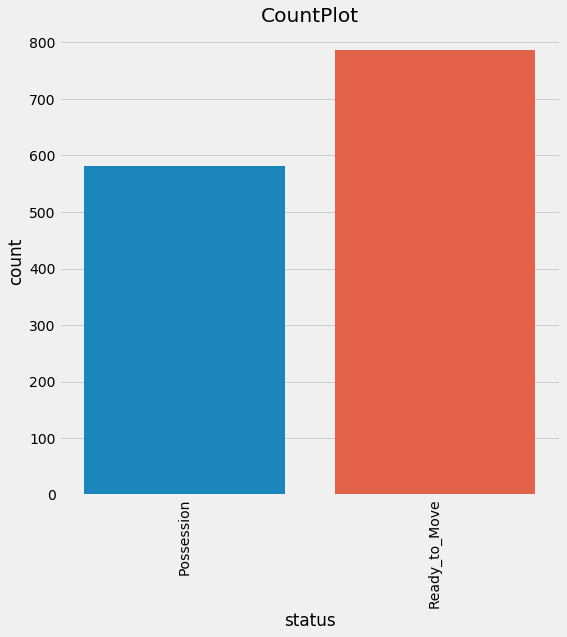

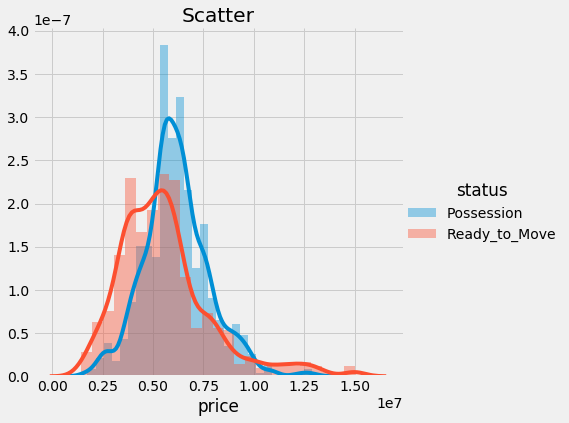

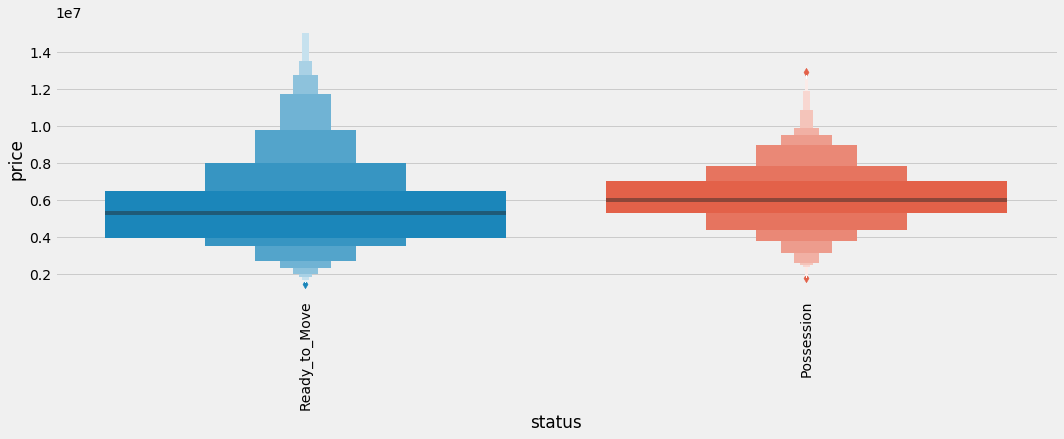

Kruskal Wallis H-test test:
H-statistic: 73.03606728864088
P-Value: 1.2730209721299363e-17
Reject NULL hypothesis - Significant differences exist between groups.


In [62]:
#frequency table for status

df_ = pd.DataFrame(
                                {'Value' :df2['status'].value_counts().index ,
                                 'Count_In_training' : df2['status'].value_counts().values, 
                                 'Count%_In_training' : df2['status'].value_counts(normalize=True).values * 100,}
                                )

print(df_)

sns.countplot(df2['status'])
plt.xticks(rotation=90)
plt.title('CountPlot')
plt.show()

sns.FacetGrid(df2,hue='status',height=6).map(sns.distplot,"price").add_legend()
plt.title('Scatter')
plt.show()

# status vs price
sns.catplot(y = "price", x = "status", data = df2.sort_values("price", ascending = False), kind="boxen", height = 5, aspect = 3)
plt.xticks(rotation=90)
plt.show()

var = [list(df2.groupby(by = 'status').groups[i]) for i in df2.groupby(by = 'status').groups]
fn_kruskal(var)

## total_parking

   Value  Count_In_training  Count%_In_training
0      1                601           43.175287
1      0                479           34.410920
2      2                297           21.336207
3      3                  7            0.502874
4      4                  3            0.215517
5      8                  2            0.143678
6      5                  2            0.143678
7      7                  1            0.071839


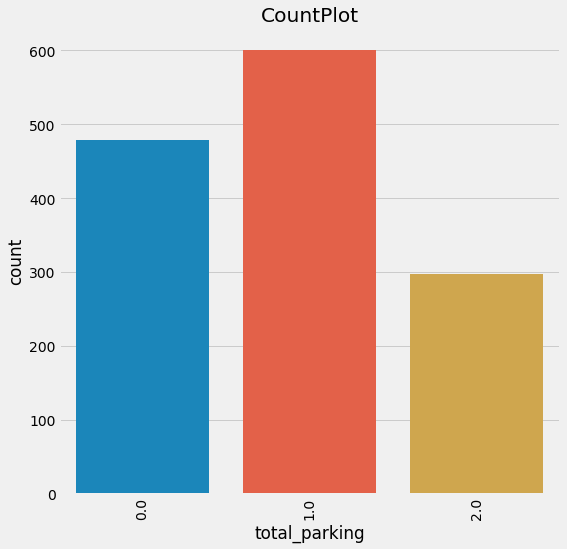

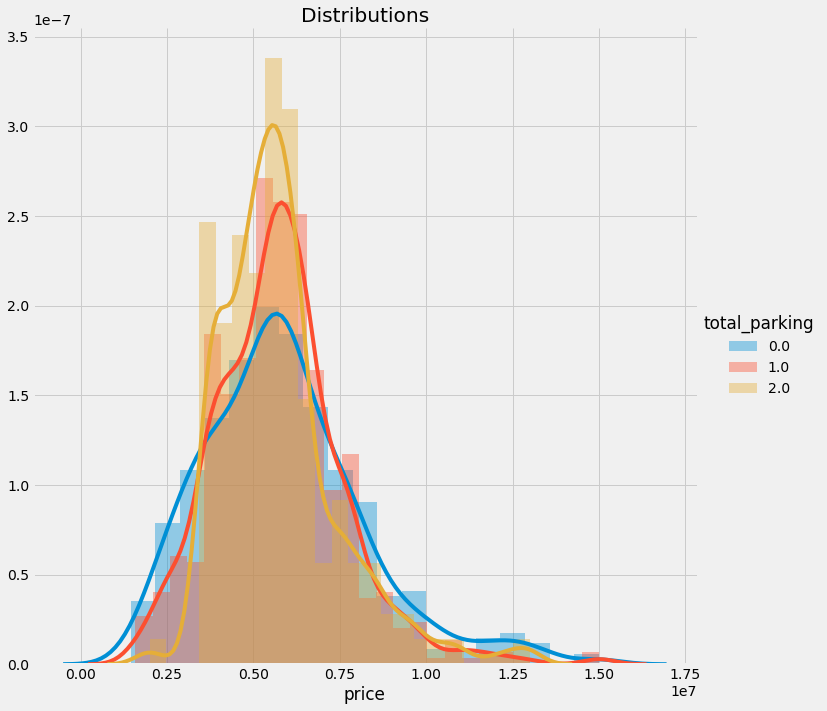

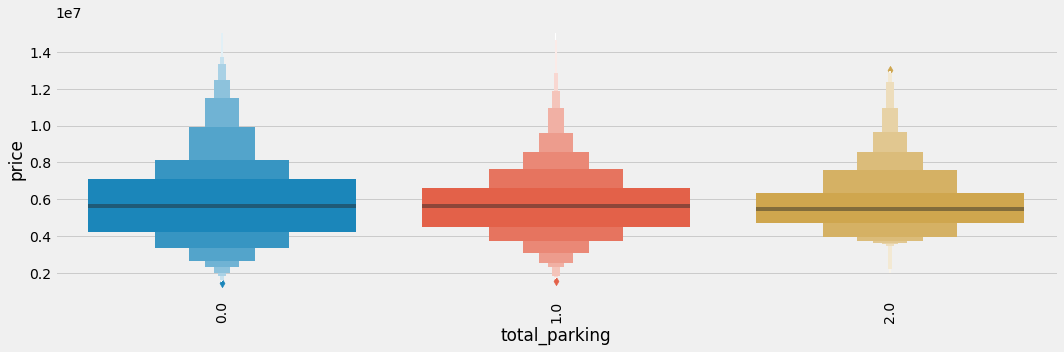

Kruskal Wallis H-test test:
H-statistic: 116.56081204639759
P-Value: 4.888113269846867e-26
Reject NULL hypothesis - Significant differences exist between groups.


In [63]:
#frequency table for total_parking

df_ = pd.DataFrame(
                                {'Value' :df2['total_parking'].value_counts().index ,
                                 'Count_In_training' : df2['total_parking'].value_counts().values, 
                                 'Count%_In_training' : df2['total_parking'].value_counts(normalize=True).values * 100,}
                                )

print(df_)

x = list(df2['total_parking'].value_counts().index[df2['total_parking'].value_counts().values<30])
df2['total_parking'] = [np.nan if i in x else i for i in df2['total_parking']]
df2['total_parking'].value_counts()


sns.countplot(df2['total_parking'])
plt.title('CountPlot')
plt.rcParams['figure.figsize'] = (8,8)
plt.xticks(rotation=90)
plt.show()

sns.FacetGrid(df2,hue='total_parking',height=10).map(sns.distplot,"price").add_legend()
plt.title('Distributions')
plt.show()

# total_parking vs price
sns.catplot(y = "price", x = "total_parking", data = df2.sort_values("price", ascending = False), kind="boxen", height = 5, aspect = 3)
plt.xticks(rotation=90)
plt.show()

var = [list(df2.groupby(by = 'total_parking').groups[i]) for i in df2.groupby(by = 'total_parking').groups]
fn_kruskal(var)

## transaction

          Value  Count_In_training  Count%_In_training
0  new_property                853           61.278736
1        resale                539           38.721264


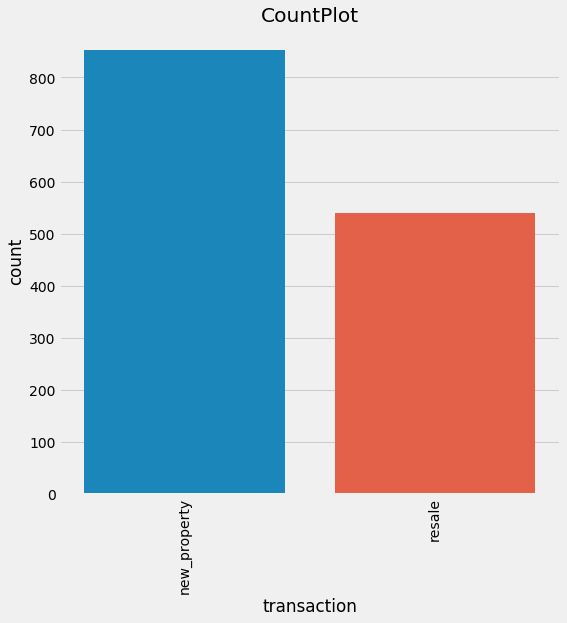

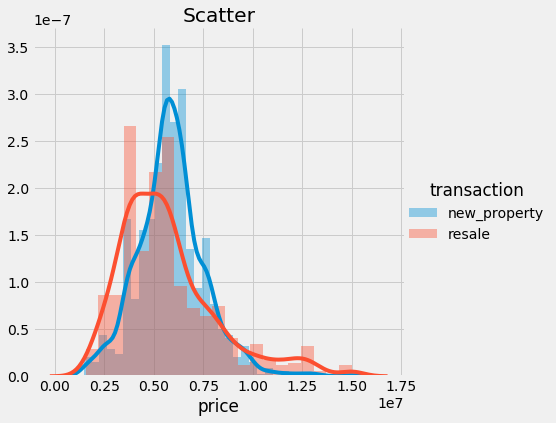

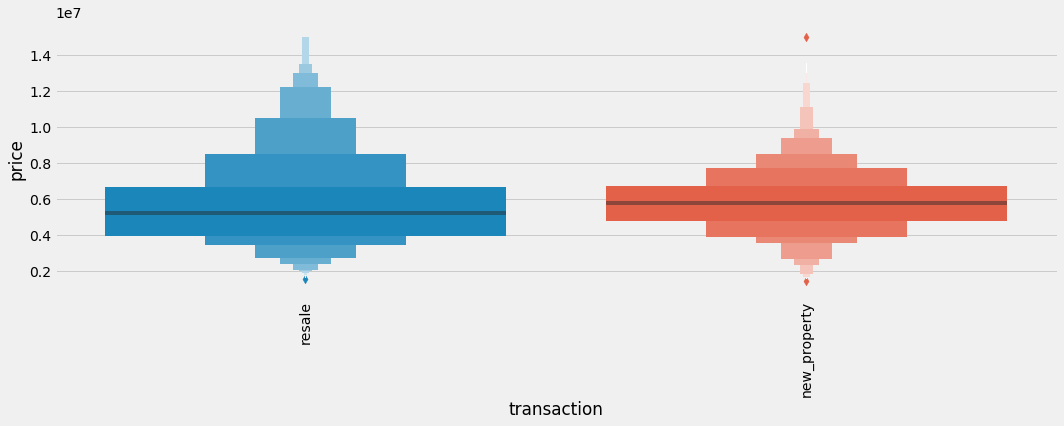

Kruskal Wallis H-test test:
H-statistic: 116.67073227301626
P-Value: 3.3891100733638e-27
Reject NULL hypothesis - Significant differences exist between groups.


In [64]:
#frequency table for transaction

df_ = pd.DataFrame(
                                {'Value' :df2['transaction'].value_counts().index ,
                                 'Count_In_training' : df2['transaction'].value_counts().values, 
                                 'Count%_In_training' : df2['transaction'].value_counts(normalize=True).values * 100,}
                                )

print(df_)

sns.countplot(df2['transaction'])
plt.xticks(rotation=90)
plt.title('CountPlot')
plt.show()

sns.FacetGrid(df2,hue='transaction',height=6).map(sns.distplot,"price").add_legend()
plt.title('Scatter')
plt.show()

# transaction vs price
sns.catplot(y = "price", x = "transaction", data = df2.sort_values("price", ascending = False), kind="boxen", height = 5, aspect = 3)
plt.xticks(rotation=90)
plt.show()

var = [list(df2.groupby(by = 'transaction').groups[i]) for i in df2.groupby(by = 'transaction').groups]
fn_kruskal(var)


# Assumptions of Regression
* Linearity ( Correct functional form )
* Homoscedasticity ( Constant Error Variance )( vs Heteroscedasticity ).
* Multivariate Normality ( Normality of Errors )
* No or little Multicollinearity.

## Linearity

Linear regression needs the relationship between each independent variable and the dependent variable to be linear. The linearity assumption can be tested with scatter plots. The following two examples depict two cases, where no or little linearity is present.

In [358]:
# Price vs area

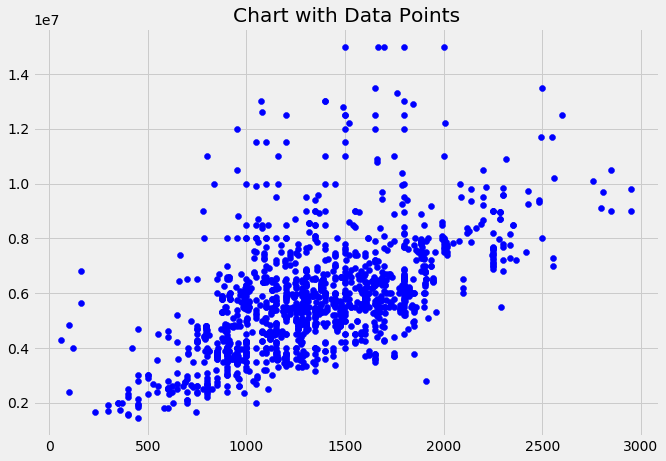

In [68]:
import seaborn as sns
plt.subplots(figsize = (10,7))
ax = plt.gca()
ax.scatter(df3.area.values, df3.price.values, color ='b');
plt.title("Chart with Data Points");

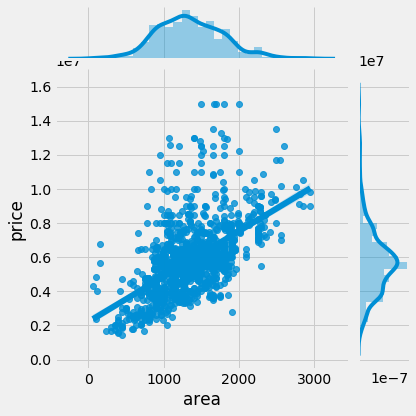

In [69]:
sns.jointplot(x=df3.area,y=df3.price,kind='reg')
plt.show()

In [70]:
df3[['price','area']].corr()

price      area
price  1.000000  0.565714
area   0.565714  1.000000

## Homoscedasticity
The assumption of Homoscedasticity is crucial to linear regression models. Homoscedasticity describes a situation in which the error term or variance or the "noise" or random disturbance in the relationship between the independent variables and the dependent variable is the same across all values of the independent variable. In other words, there is a constant variance present in the response variable as the predictor variable increases. If the "noise" is not the same across the values of an independent variable like the residual plot above, we call that Heteroscedasticity. As you can tell, it is the opposite of Homoscedasticity.

One way to fix this Heteroscedasticity is by using a transformation method like log-transformation or box-cox transformation. We will do that later if required.

## Multivariate Normality ( Normality of Errors)
The linear regression analysis requires the dependent variable to be multivariate normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. The goodness of fit test, e.g., the Kolmogorov-Smirnov test can check for normality in the dependent variable. We already know that our target variable does not follow a normal distribution. Let's bring back the three charts to show our target variable.

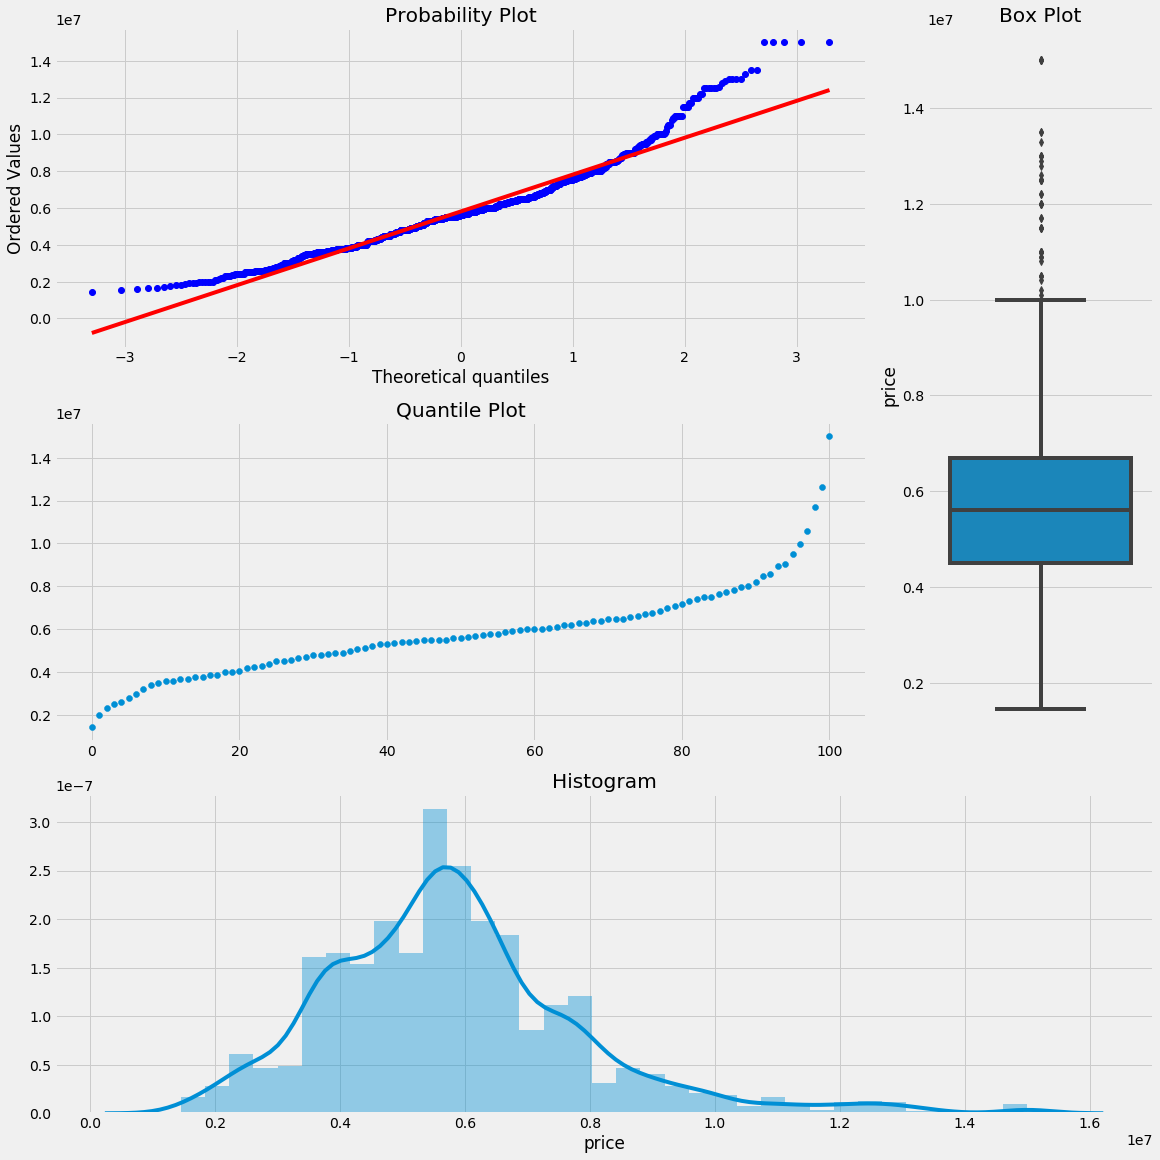

In [71]:
plotting_3_chart(df3,'price')

## No or Little multicollinearity:
Multicollinearity is when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. Multicollinearity can lead to a variety of problems, including:

The effect of predictor variables estimated by our regression will depend on what other variables are included in our model.
Predictors can have wildly different results depending on the observations in our sample, and small changes in samples can result in very different estimated effects.
With very high multicollinearity, the inverse matrix, the computer calculates may not be accurate.
We can no longer interpret a coefficient on a variable as the effect on the target of a one-unit increase in that variable holding the other variables constant. The reason behind that is, when predictors are strongly correlated, there is not a scenario in which one variable can change without a conditional change in another variable.
Heatmap is an excellent way to identify whether there is multicollinearity or not. The best way to solve multicollinearity is to use regularization methods like Ridge or Lasso.

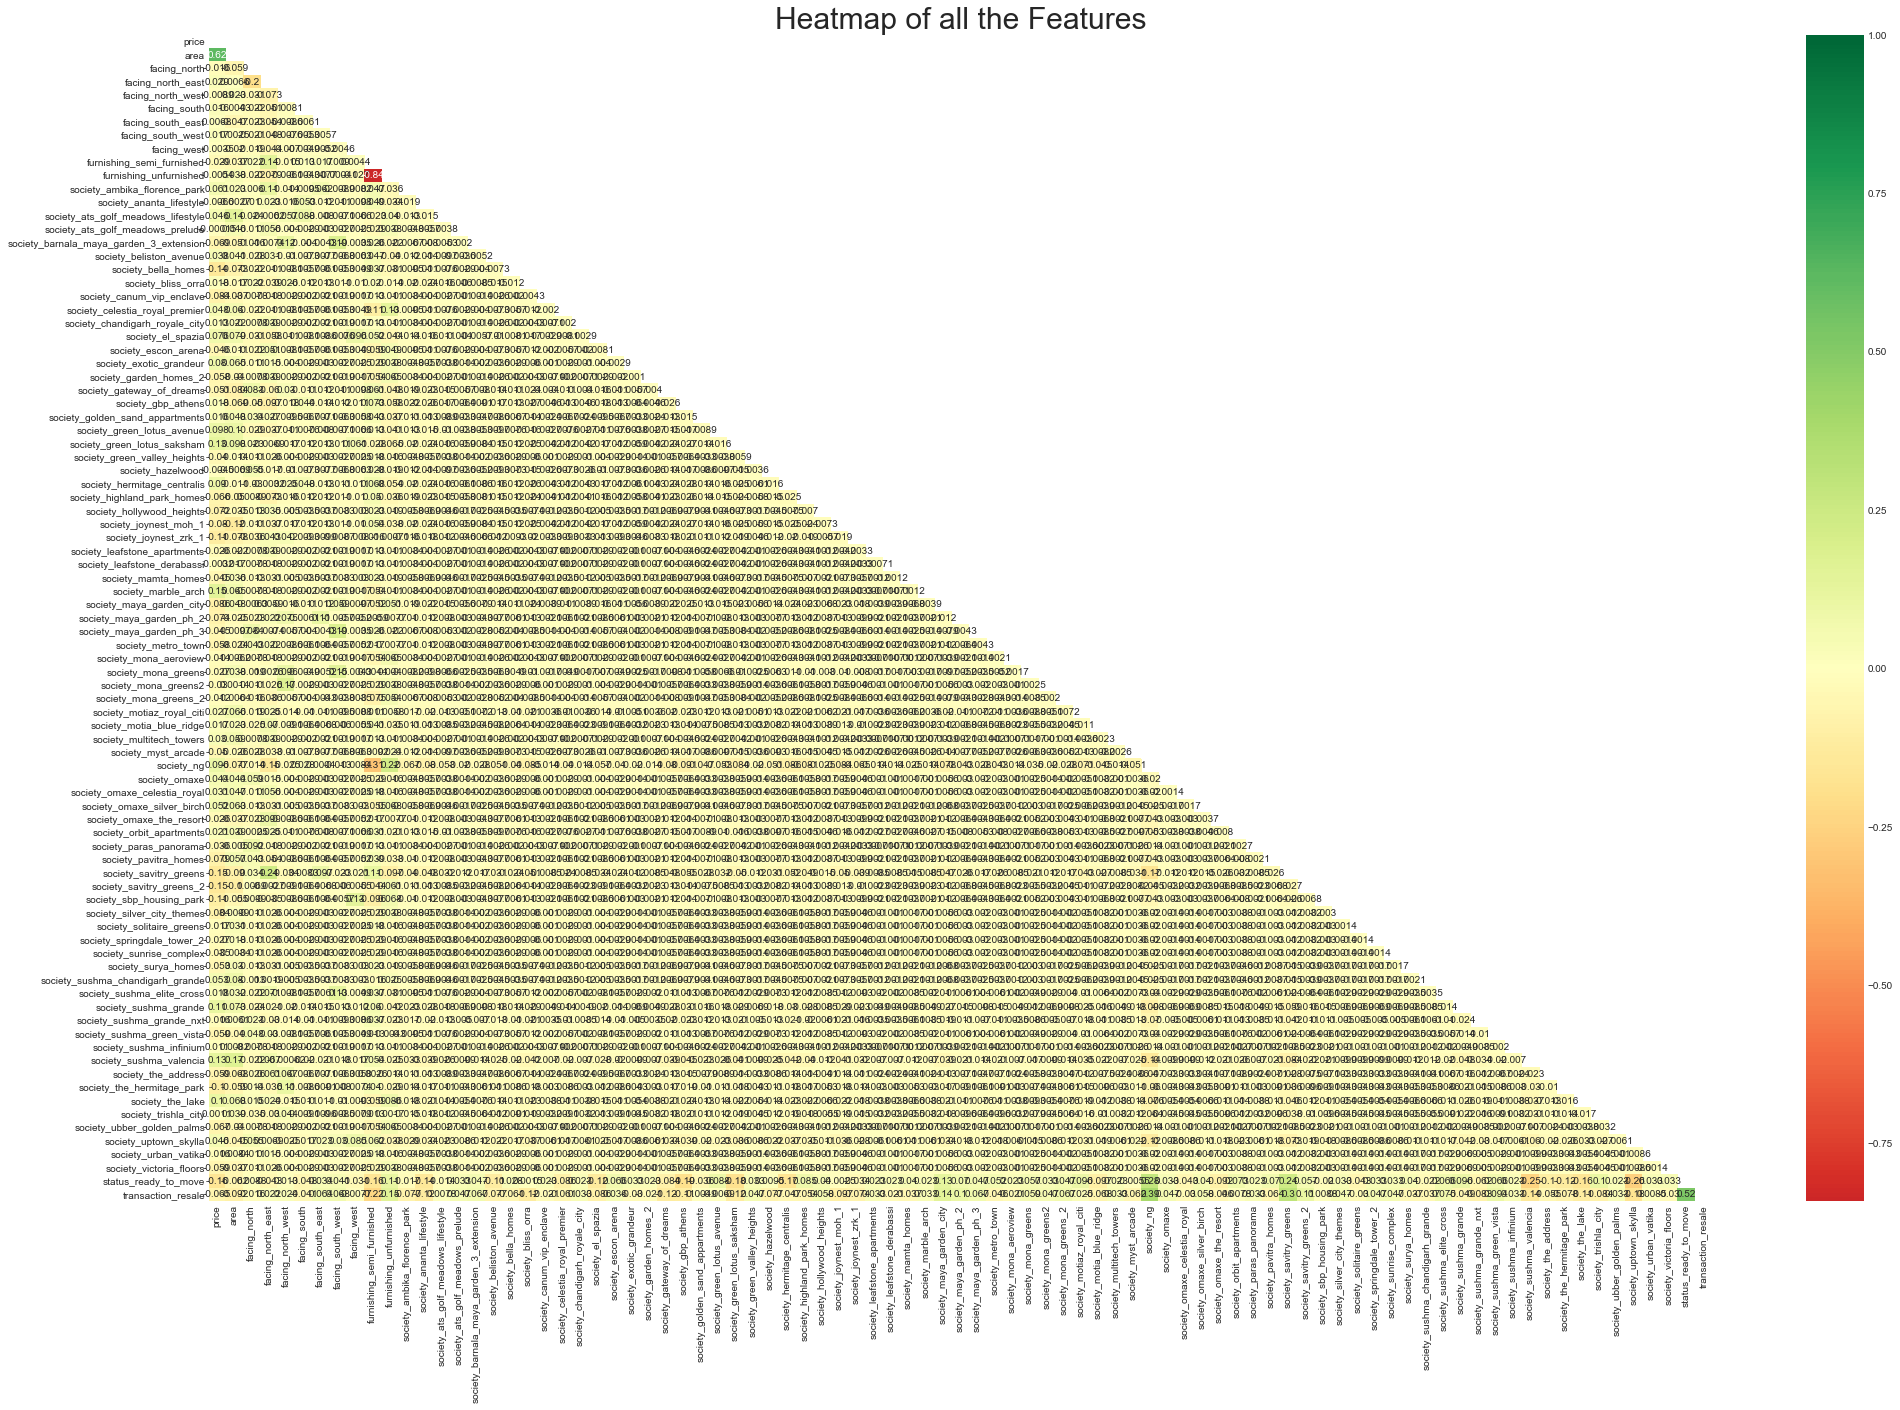

In [315]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df3.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df3.corr(), 
            cmap='RdYlGn', 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);


Above we can see some dark patches of red and green showing the multicollinearity exists

# Preprocessing

## Creating Dummies

 This transforms each categorical feature with n_categories possible values into n_categories binary features, with one of them 1, and all others 0.

In [65]:
cat_var = list(df2.columns.difference(['area','price']))
df2[cat_var] = df2[cat_var].astype('category')
d = ['facing','furnishing','society','status','transaction']

df3 = pd.concat([df2,pd.get_dummies(df2[d],drop_first=True)],axis=1).drop(d,axis = 1)

df3.columns = [i.replace(' ','_').replace('.','_').lower() for i in df3.columns]

## Scaling
scaled_array = (original_array - mean_of_array)/std_of_array

Xsc=(X−Xmin)/(Xmax−Xmin)

In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_tr = pd.DataFrame(scaler.fit_transform(df3))
df_tr.columns = df3.columns

## Feature Selection

In [135]:
X = df_tr.drop('price',axis=1).dropna()
y = df_tr.dropna().price

### Correlation

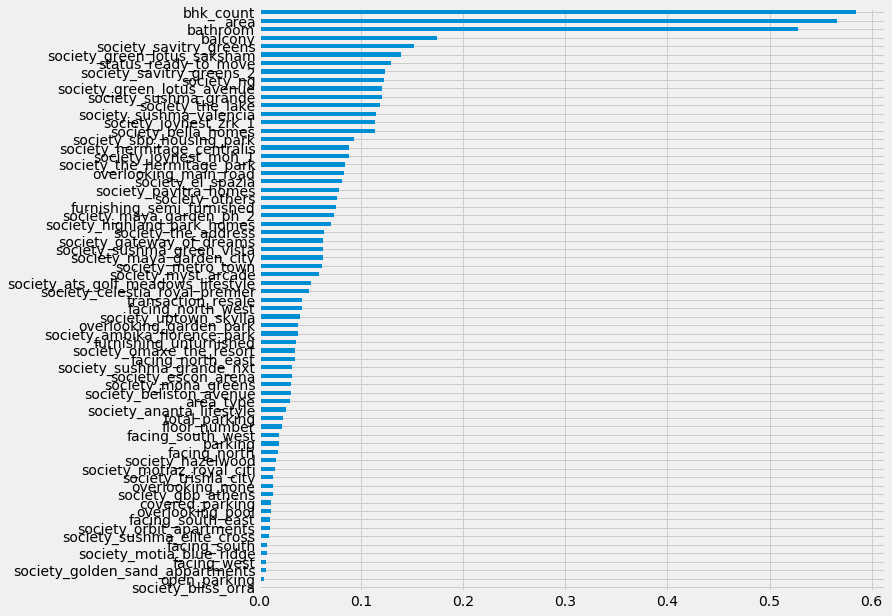

In [136]:
plt.figure(figsize=(10,10))
correlation=abs(df_tr.corr()['price'])
del correlation['price']
correlation.sort_values(ascending=True).plot(kind='barh')
plt.yticks(ha='right')
plt.show()

### Lasso Regression

Text(0, 0.5, 'rmse')

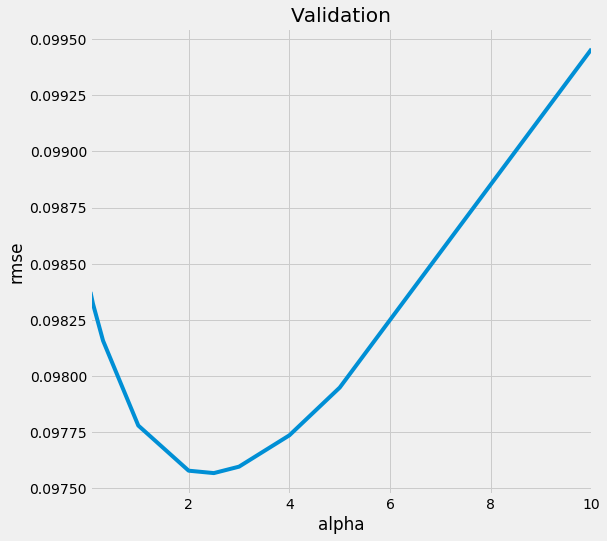

In [141]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
cross_val_score(Ridge(), X, y, scoring="neg_mean_squared_error", cv = 5)

alphas = [0.05, 0.1, 0.3, 1, 2, 2.5, 3, 4, 5, 10]
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [143]:
###Model Lasso regression
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005,3,2.5,2,4,1.4,1.5],random_state=2020,max_iter=10000).fit(X,y)
rmse_cv(model_lasso).mean()

0.10017417409356458

In [144]:
###Model Lasso regression
coef = pd.Series(model_lasso.coef_, index = X.columns)
coef.head()

balcony                    0.010361
bathroom                   0.047833
overlooking_garden_park    0.001437
overlooking_none          -0.000000
overlooking_pool          -0.000000
dtype: float64

In [145]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 41 variables and eliminated the other 28 variables


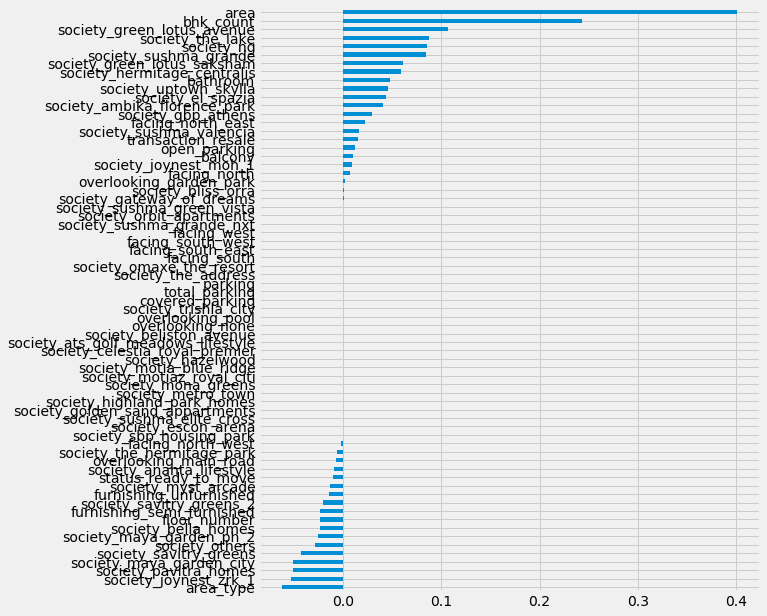

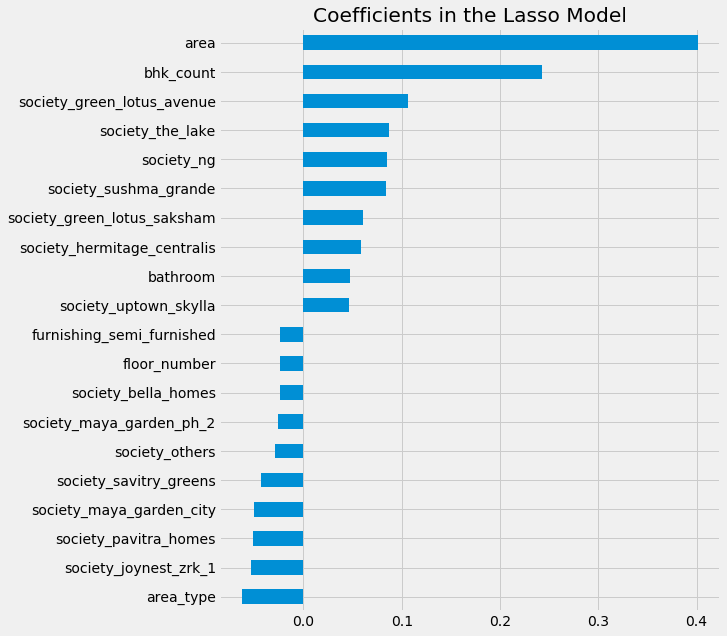

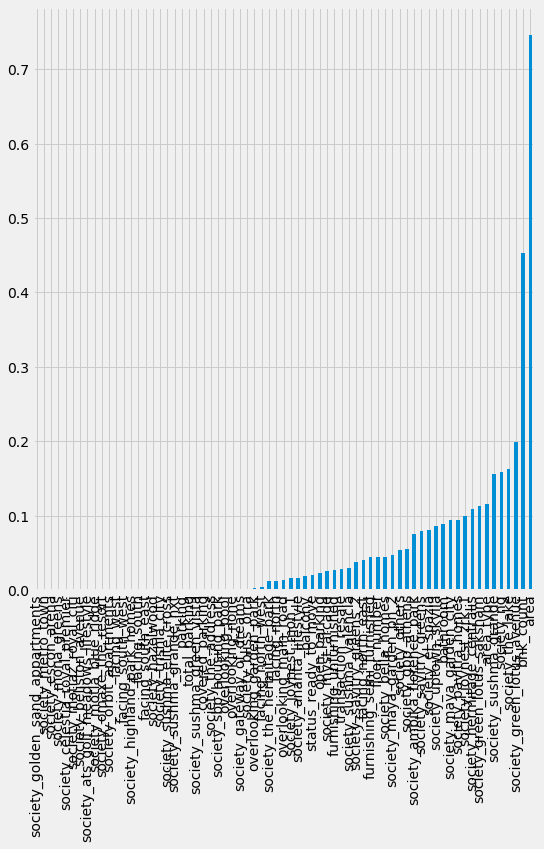

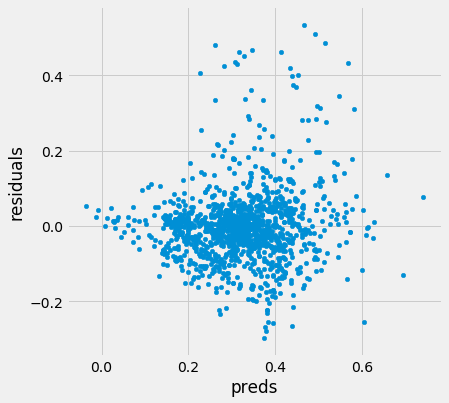

In [146]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
lassocoeff = pd.Series((model_lasso.coef_), index=X.columns)
lassocoeff.sort_values(ascending=True).plot(kind='barh')
plt.show()



imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

normLasso = lassocoeff/np.linalg.norm(lassocoeff)
normLasso = pd.Series(abs(normLasso), index=X.columns)
normLasso.sort_values(ascending=True).plot(kind='bar')
plt.show()


plt.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":model_lasso.predict(X), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.show()


#Here notice the 'imp_coef' will give us the important features that will be of our major interest.

### Ridge Regression

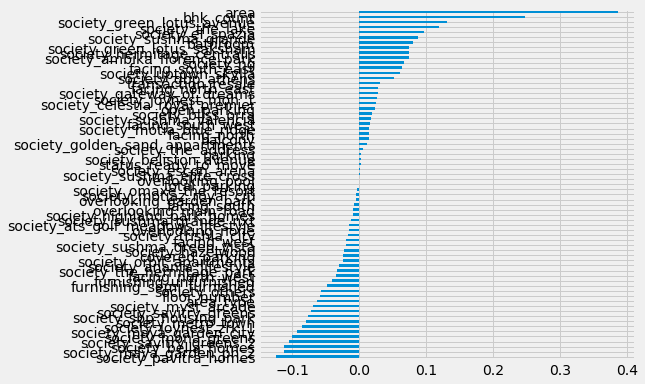

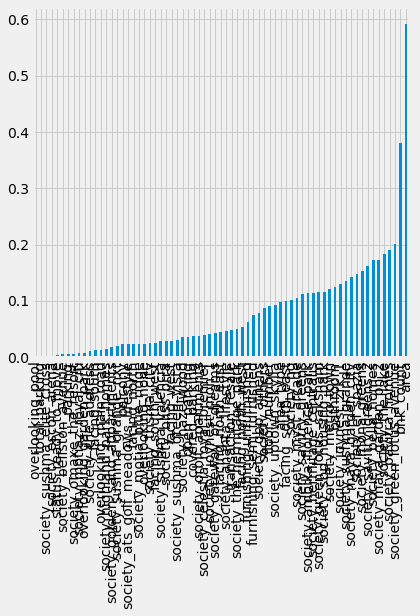

In [148]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X,y)
ridgecoeff = pd.Series((ridge.coef_), index=X.columns)
ridgecoeff.sort_values(ascending=True).plot(kind='barh')
plt.show()
normRidge = ridgecoeff/np.linalg.norm(ridgecoeff)
normRidge = pd.Series(abs(normRidge), index=X.columns)
normRidge.sort_values(ascending=True).plot(kind='bar')
plt.yticks(ha='right')
plt.show()

### Decision Tree

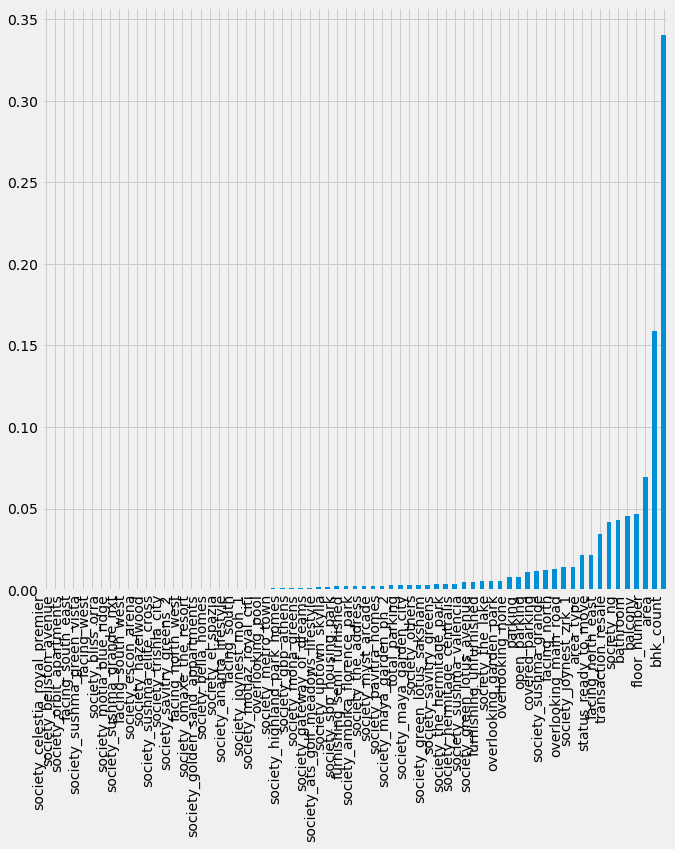

In [149]:
plt.figure(figsize=(10,10))

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X,y)
feat_importances1 = pd.Series(dt.feature_importances_, index=X.columns)
feat_importances1.sort_values(ascending=True).plot(kind='bar')
plt.xticks(ha='right')
plt.show()

### Random Forest

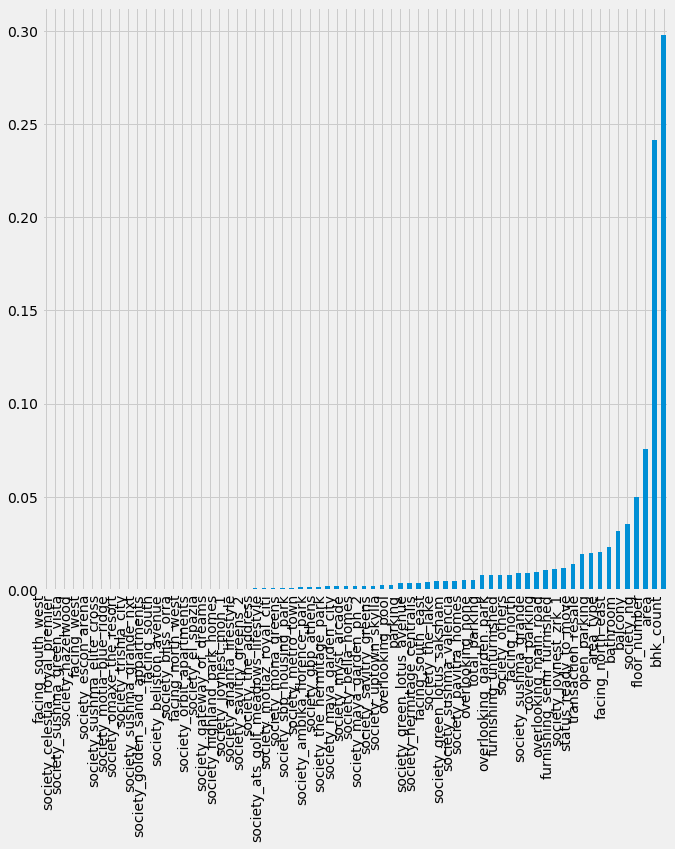

In [150]:
plt.figure(figsize=(10,10))

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X,y)
feat_importances2 = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances2.sort_values(ascending=True).plot(kind='bar')
plt.xticks(ha='right')
plt.show()

### ExtraTrees

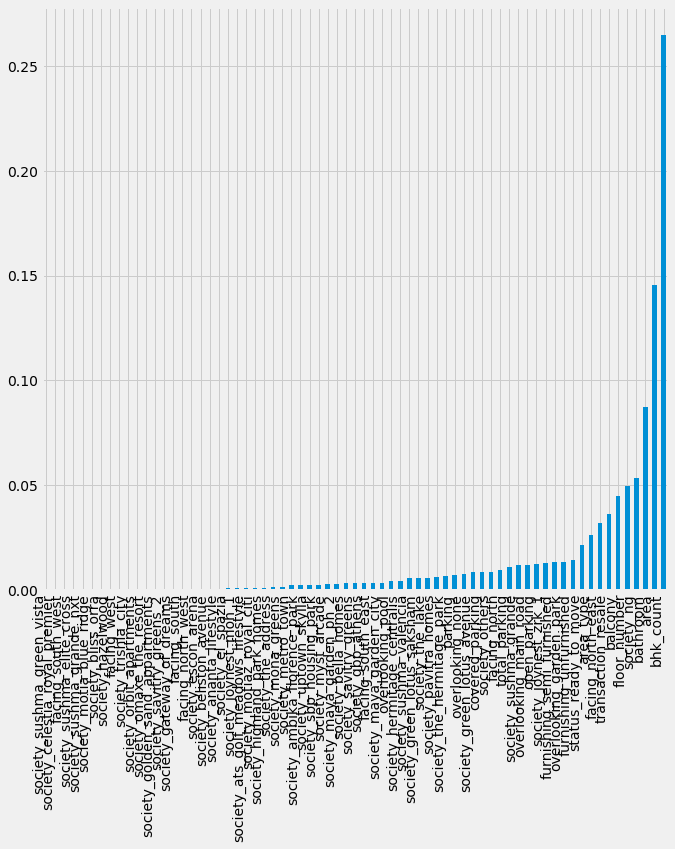

In [151]:
plt.figure(figsize=(10,10))

from sklearn.ensemble import ExtraTreesRegressor
et=ExtraTreesRegressor()
et.fit(X,y)
feat_importances3 = pd.Series(et.feature_importances_, index=X.columns)
feat_importances3.sort_values(ascending=True).plot(kind='bar')
plt.xticks(ha='right')
plt.show()

### GradientBoostingRegressor

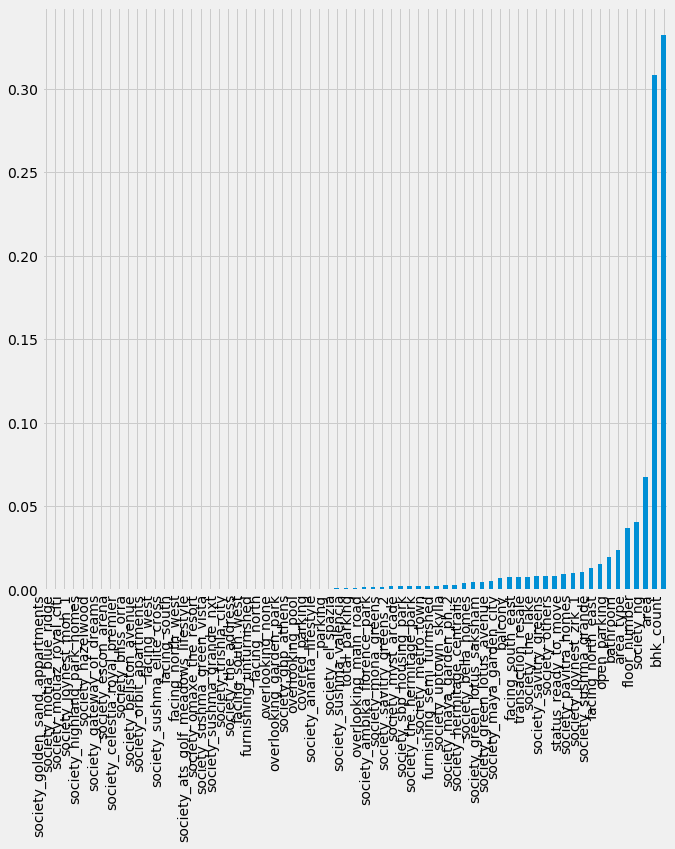

In [153]:
plt.figure(figsize=(10,10))

from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X,y)
feat_importances4 = pd.Series(gbr.feature_importances_, index=X.columns)


plt.rcParams['figure.figsize'] = (8,10)

feat_importances4.sort_values(ascending=True).plot(kind='bar')
plt.xticks(ha='right')
plt.show()

In [154]:
combinedDf = {
        'DecisionTree': feat_importances1,
        'RandomForest': feat_importances2,
        'ExtraTrees': feat_importances3,
        'GradientBoostedTrees': feat_importances4,
        'Lasso':normLasso,
        'Ridge':normRidge,
        'CorrelationMatrix':correlation}

In [155]:
pd.DataFrame(combinedDf)

DecisionTree  RandomForest  ExtraTrees  \
balcony                      0.046913      0.035282    0.044896   
bathroom                     0.045172      0.031565    0.087087   
overlooking_garden_park      0.005350      0.007904    0.013528   
overlooking_none             0.007796      0.005614    0.007681   
overlooking_pool             0.000914      0.002569    0.004108   
...                               ...           ...         ...   
society_trishla_city         0.000335      0.000302    0.000318   
society_uptown_skylla        0.001863      0.002451    0.002522   
society_others               0.003361      0.008179    0.008816   
status_ready_to_move         0.021426      0.014179    0.021282   
transaction_resale           0.041955      0.019311    0.036259   

                         GradientBoostedTrees     Lasso     Ridge  \
balcony                              0.007604  0.019282  0.022496   
bathroom                             0.023932  0.089016  0.124134   
overlooking_garden_park              0.000416  0.002674  0.007687   
overlooking_none                     0.000392  0.000000  0.023899   
overlooking_pool                     0.000531  0.000000  0.000826   
...                                       ...       ...       ...   
society_trishla_city                 0.000000  0.000000  0.024921   
society_uptown_skylla                0.002962  0.085552  0.092886   
society_others                       0.008581  0.053333  0.087156   
status_ready_to_move                 0.009605  0.019575  0.004242   
transaction_resale                   0.007993  0.027960  0.047368   

                         CorrelationMatrix  
balcony                           0.174313  
bathroom                          0.527383  
overlooking_garden_park           0.038542  
overlooking_none                  0.013513  
overlooking_pool                  0.011324  
...                                    ...  
society_trishla_city              0.013638  
society_uptown_skylla             0.040158  
society_others                    0.076847  
status_ready_to_move              0.129681  
transaction_resale                0.042375  

[69 rows x 7 columns]

In [156]:
weight1= np.random.randint(1,10)/10
weight2= np.random.randint(1,10)/10
weight3= np.random.randint(1,10)/10
weight4= np.random.randint(1,10)/10
weight5= np.random.randint(1,10)/10
weight6= np.random.randint(1,10)/10
weight7= np.random.randint(1,10)/10
weightSum=weight1+weight2+weight3+weight4+weight5+weight6+weight7

In [157]:
feat=(weight1*feat_importances1+weight2*feat_importances2
      +weight3*feat_importances3+weight4*feat_importances4+
      weight5*normLasso+weight6*normRidge+weight7*correlation)/(weightSum)

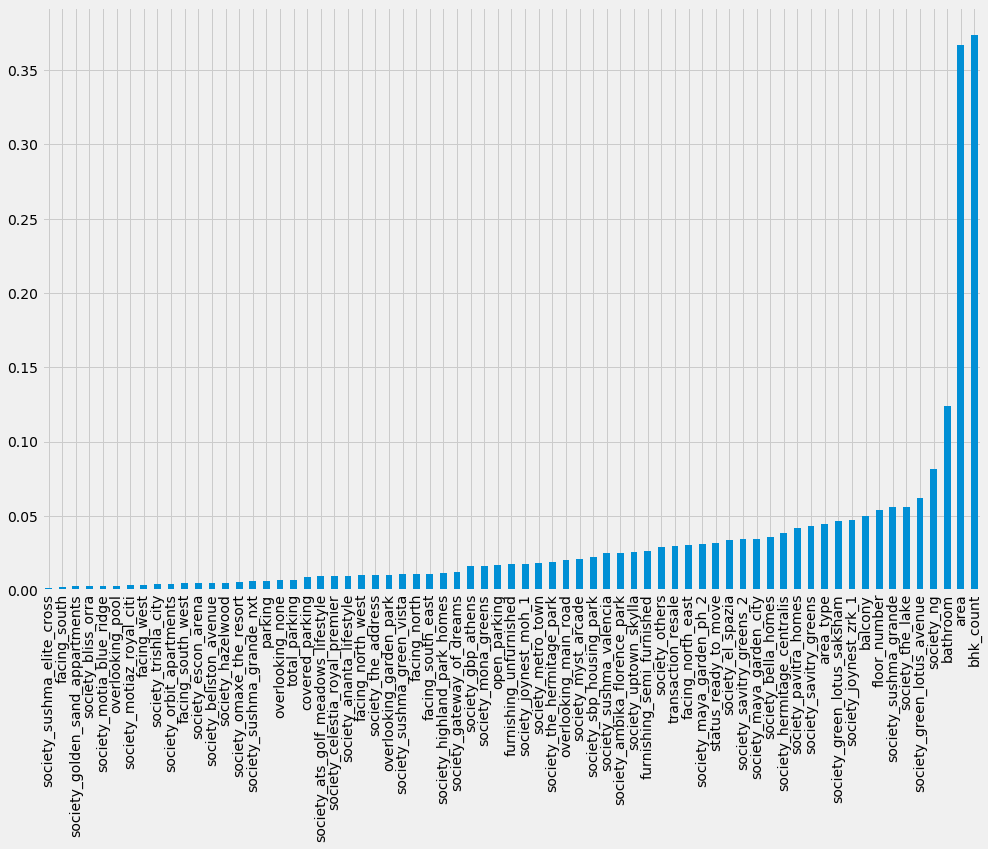

In [158]:
plt.figure(figsize=(15,10))
feat.sort_values(ascending=True).plot(kind='bar')
plt.show()

## VIF

In [183]:
features_new = list(feat.sort_values(ascending=False)[0:3].keys())

predictors = list(features_new)
equation = 'price' + '~' + '+'.join(predictors) 

In [184]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#gather features


# get y and X dataframes based on this regression:
y, X = dmatrices(equation, df_tr, return_type='dataframe')


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif.round(1)

#rolloff_mean
#harm_std
#spec_bw_mean
#mfcc_var

VIF Factor   Features
0        11.1  Intercept
1         3.4  bhk_count
2         2.1       area
3         3.3   bathroom

## Splitting Data

In [185]:
X = df_tr.drop('price',axis=1).dropna()
y = df_tr.dropna().price

X = X[predictors]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Modelling

In [186]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [187]:
y_pred = reg_rf.predict(X_test)

In [188]:
reg_rf.score(X_train, y_train)

0.7099189121653315

In [189]:
reg_rf.score(X_test, y_test)

0.3306572558037012

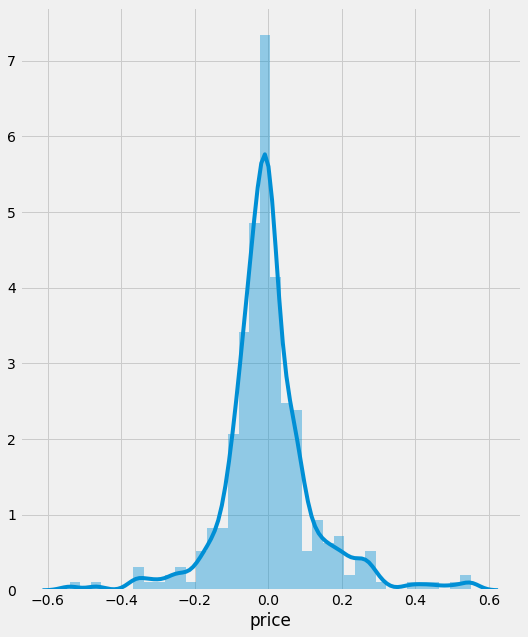

In [190]:
sns.distplot(y_test-y_pred)
plt.show()

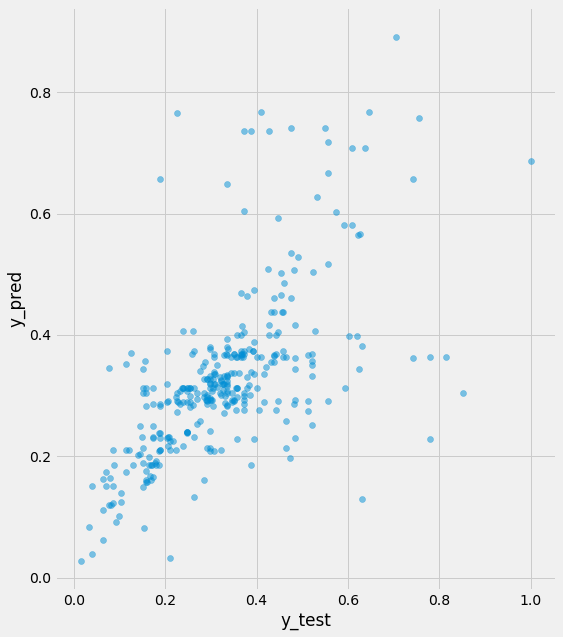

In [191]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [192]:
from sklearn import metrics


In [193]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.08054080793554666
MSE: 0.01579058670343064
RMSE: 0.12566060123774134


In [388]:
# RMSE/(max(DV)-min(DV))

978524.1395/(max(y)-min(y))

284860.54069749365

In [389]:
metrics.r2_score(y_test, y_pred)

0.6813514501481969

# Hyperparameter Tuning
* Choose following method for hyperparameter tuning
        * RandomizedSearchCV --> Fast
        * GridSearchCV
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [194]:
from sklearn.model_selection import RandomizedSearchCV

In [195]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [196]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [197]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 40, verbose=2, random_state=42, n_jobs = 1)

In [198]:
rf_random.fit(X_train,y_train)


Fitting 40 folds for each of 10 candidates, totalling 400 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samp

[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.1s
[CV] n_estimators=1100, min_sample

[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.8s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.8s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.7s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.6s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.8s
[CV] n_estimators=300, min_samples

[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.8s
[CV] n_estimators=400, min_samples_split=5, min_sa

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.8s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.6s
[CV] n_estimators=700, min_samples_split=5, 

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   3.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   2.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   2.4s
[CV] n_estimators=1000, min_samples_split=2

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   3.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   3.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   2.7s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=1100, min_samples_spl

[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.6s
[CV] n_estimators=300, min_samples_s

[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.6s
[CV] n_estimators=700, min_samples_split=10

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=15, min_sam

[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.4s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.6s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=700, min_samples_split=15

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 10.7min finished


RandomizedSearchCV(cv=40, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [199]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [200]:
prediction = rf_random.predict(X_test)

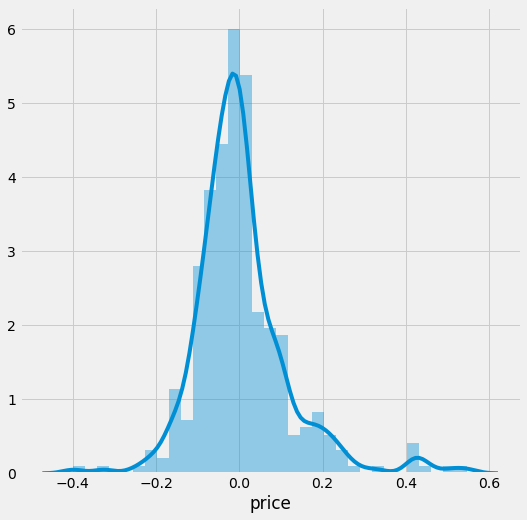

In [201]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

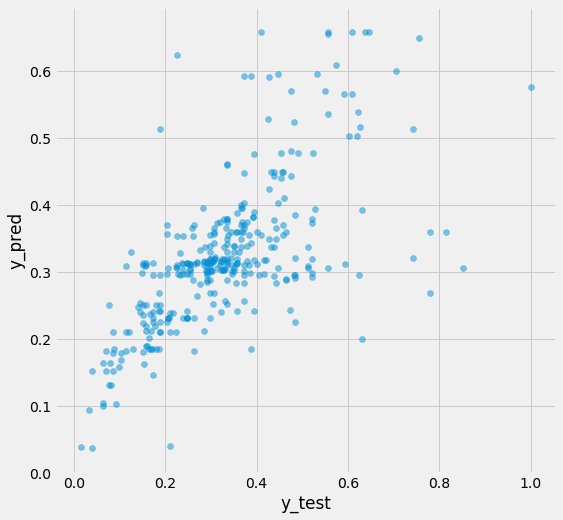

In [202]:

plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [203]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.07701763163828317
MSE: 0.01309569547472112
RMSE: 0.11443642547161773


In [ ]:
feat.nlargest(13).index

In [ ]:
import pickle

In [ ]:
pickle.dump(rf_random, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1475,1,1,5,1,1,1,1,1,0,0,0,0]]))

In [ ]:
X_test.columns